<a href="https://colab.research.google.com/github/tinayiluo0322/XAI_Projects/blob/main/Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03
### Interpretable ML
### Luopeiwen Yi


### Project Overview

This project focuses on analyzing customer churn for a telecommunications company using data from [Kaggle's Telco Customer Churn dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). **Customer churn** refers to when customers leave the company for a competitor. The goal of this project is to **understand the factors** contributing to customer churn and to develop **interpretable models** that can predict which customers are most at risk of churning. The models used will vary in complexity and will include linear regression, logistic regression, and a generalized additive model (GAM).

#### Key Tasks

1. **Exploratory Data Analysis (EDA)**:
   - Perform EDA to explore relationships between customer features and churn. Assumptions for linear regression, logistic regression, and GAM will be checked using visualizations and statistical methods.
   - Understand the distribution of features like tenure, monthly charges, and contract types to determine their impact on churn.

2. **Modeling Approaches**:
   - **Linear Regression**: Treat the churn variable as continuous (0 = staying, 1 = churning) and build a linear regression model. While linear regression is interpretable, it may not fully capture the complexity of churn, as this model assumes a linear relationship.
   - **Logistic Regression**: Build a binary classification model (0 = staying, 1 = churning) using logistic regression to predict the probability of churn. This method models the log-odds of churn and offers a straightforward way to interpret feature contributions.
   - **Generalized Additive Model (GAM)**: Use GAM to account for non-linear relationships between customer features and churn. GAM provides more flexibility by modeling smooth, non-linear effects, offering deeper insights into how customer features interact to predict churn.

3. **Model Comparison and Evaluation**:
   - **Linear Regression**: Low MSE (0.17) indicates that the model makes relatively accurate predictions, but the low R² (0.15) suggests that it explains only 15% of the variance in churn, making it too simplistic.
   - **Logistic Regression (Threshold = 0.4)**: Strong accuracy (82.11%) and AUC-ROC (0.8659) show that the model performs well in discriminating between churners and non-churners. Precision (65.01%) and recall (70.24%) indicate a moderate balance between capturing churners and avoiding false positives.
   - **Generalized Additive Model (GAM, Threshold = 0.1)**: Slightly lower accuracy (80.84%) but captures complex, non-linear relationships between features and churn. AUC-ROC (0.8602) remains strong, and precision (64.11%) and recall (62.73%) demonstrate a balanced model, though it sacrifices some precision for improved recall.

#### Key Results and Recommendations

- **Linear Regression**: Although the model minimizes prediction error (low MSE), it fails to explain the variance in churn (low R²) and is not suitable for predicting binary outcomes like churn. **Not recommended** for the company’s churn prediction task.
  
- **Logistic Regression (Threshold = 0.4)**: The model strikes a good balance between interpretability and predictive performance. With strong accuracy (82.11%) and discriminatory ability (AUC-ROC = 0.8659), it is effective at predicting churn. The high recall (70.24%) ensures that most churners are captured, though the company should be prepared to handle false positives. **Recommended** for operational use when both interpretability and strong prediction are required.

- **Generalized Additive Model (GAM, Threshold = 0.1)**: GAM captures **non-linear relationships** between features and churn, providing valuable insights into customer behavior. With a high AUC-ROC (0.8602) and flexible modeling of features, GAM is a strong tool for **understanding churn drivers**. However, the slightly lower precision and recall make it less ideal for immediate operational use. **Recommended** for strategic insights and deeper analysis into the factors driving churn, complementing the logistic regression model.

#### Recommendations

- **Primary Model**: Use **logistic regression** for churn prediction due to its strong accuracy, interpretability, and balance between precision and recall.
- **Strategic Insights**: Leverage the **Generalized Additive Model (GAM)** to gain insights into non-linear feature effects and interactions that contribute to customer churn. GAM's ability to capture complex patterns makes it a valuable tool for understanding churn drivers, though it may require more computational effort and fine-tuning.

- Both models complement each other well. Logistic regression can serve as the primary operational model for predicting churn, while GAM can provide strategic insights into customer behavior for targeted retention efforts.

In [4]:
import os

# Remove Colab default sample_data if it exists
if os.path.isdir("./sample_data"):
    !rm -r ./sample_data

# Clone GitHub repo (force re-clone if it already exists)
repo_name = "XAI_Projects"
git_path = 'https://github.com/tinayiluo0322/XAI_Projects.git'

if os.path.isdir(repo_name):
    !rm -rf "{repo_name}"
!git clone "{git_path}"

# Install dependencies from requirements.txt if it exists
#requirements_file = os.path.join(repo_name, 'requirements.txt')
#if os.path.isfile(requirements_file):
    #!pip install -r "{requirements_file}"
#else:
    #print("No requirements.txt found, skipping dependency installation.")

# Change working directory to location of notebook
notebook_dir = 'Interpretable_ML'
path_to_notebook = os.path.join(repo_name, notebook_dir)

# Check if the directory exists
if os.path.isdir(path_to_notebook):
    %cd "{path_to_notebook}"
    %ls
else:
    print(f"Directory {path_to_notebook} not found")

Cloning into 'XAI_Projects'...
remote: Enumerating objects: 6093, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6093 (delta 8), reused 6 (delta 6), pack-reused 6078 (from 1)
Receiving objects: 100% (6093/6093), 94.89 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Updating files: 100% (5014/5014), done.
/content/XAI_Projects/Interpretable_ML
Placeholder  Telco-Customer-Churn.csv


Import Libraries

In [5]:
!pip install linearmodels
!pip install pygam
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np
import pandas as pd
from pygam import LogisticGAM, s, f
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.iv import IV2SLS
from scipy.stats import chi2
from statsmodels.stats.diagnostic import linear_reset
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_recall_curve, f1_score, precision_score, recall_score, roc_curve

In [6]:
# Check if a GPU is available
if torch.cuda.is_available():
    gpu_count = torch.cuda.device_count()
    print(f"Number of GPUs available: {gpu_count}")
    for i in range(gpu_count):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"Memory Allocated: {torch.cuda.memory_allocated(i)/1024**2:.2f} MB")
        print(f"Memory Cached: {torch.cuda.memory_reserved(i)/1024**2:.2f} MB")
else:
    print("No GPU found, running on CPU.")

No GPU found, running on CPU.


Import Data

In [7]:
# URL for the dataset
url = "https://raw.githubusercontent.com/tinayiluo0322/XAI_Projects/main/Interpretable_ML/Telco-Customer-Churn.csv"

# Reading the CSV file from the URL and transforming it into a pandas dataframe
df = pd.read_csv(url)

# Displaying the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

1. Predictor Variable:
- Categorical

Gender:Female, Male

Senior Citizen: 0, 1

Partner: Yes, No

Dependents: Yes, No

Phone Service: Yes, No

Multiple Lines: No Phone Service, No, Yes

Internet Service: DSL, Fiber optic, No

Online Security: No, Yes, No internet service

Online Backup: No, Yes, No internet service

Device Protection: No, Yes, No internet service

Tech Support: No, Yes, No internet service

Streaming TV: No, Yes, No internet service

Streaming Movies: No, Yes, No internet service

Contract: Month-to-month, one year, two year

PaperlessBilling: Yes, No

Payment Method: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

- Continuous

Tenure

Monthly Charges

Total Charges

2. Outcome Variable:

Churn: No, Yes


In [8]:
# Define which variables are categorical and continuous
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

Exploring categorical variable: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


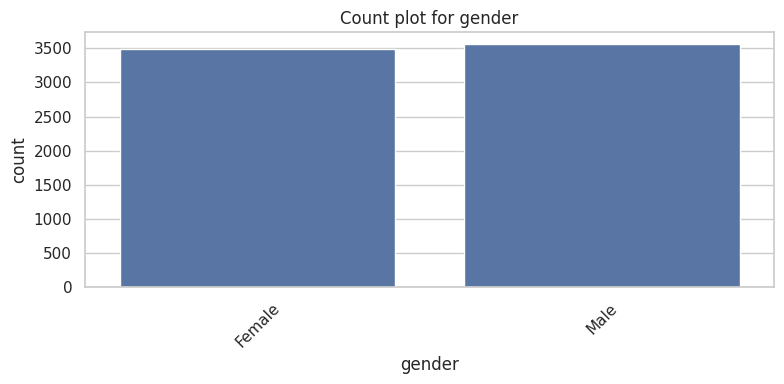

Exploring categorical variable: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


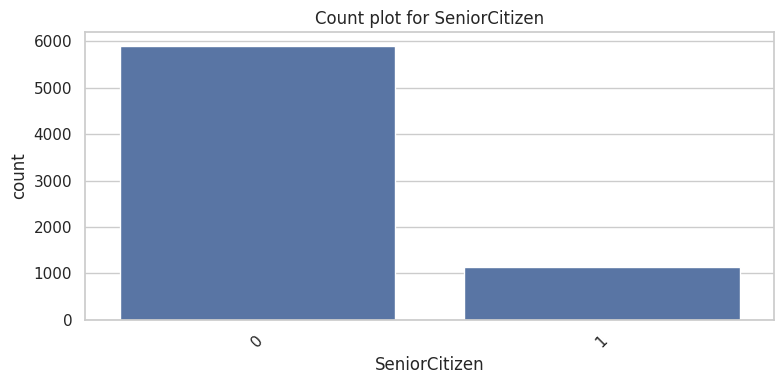

Exploring categorical variable: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


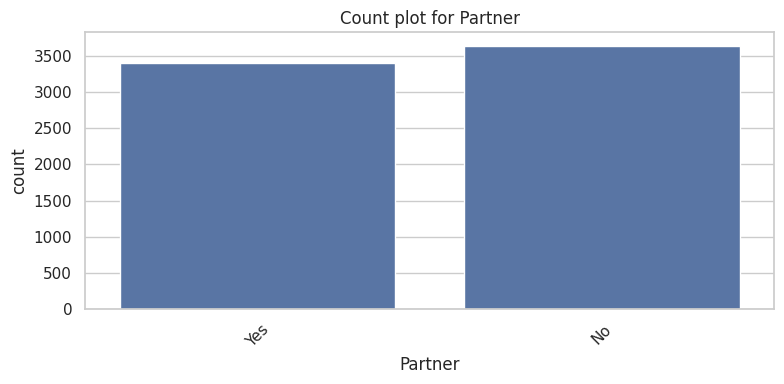

Exploring categorical variable: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


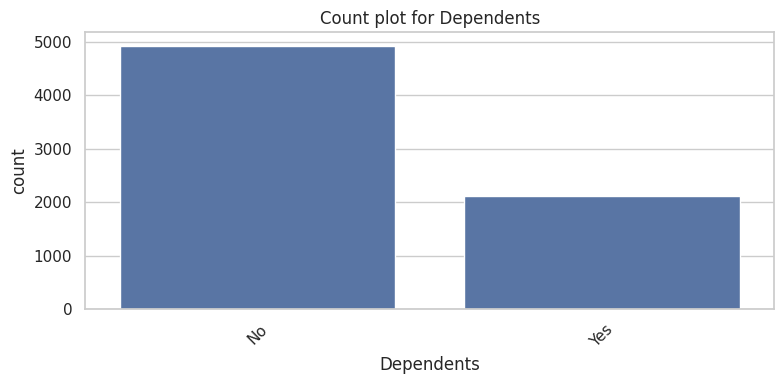

Exploring categorical variable: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


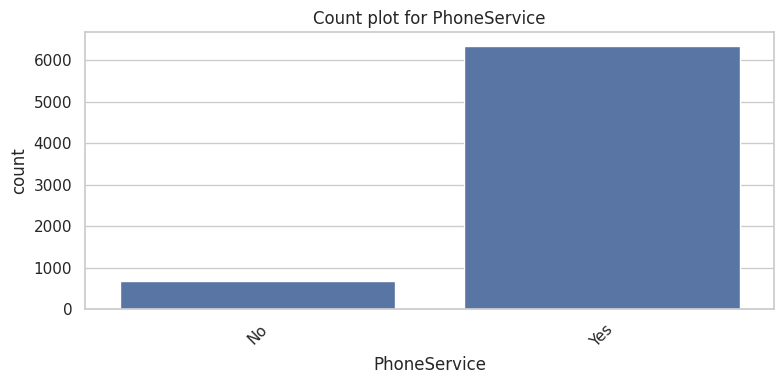

Exploring categorical variable: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


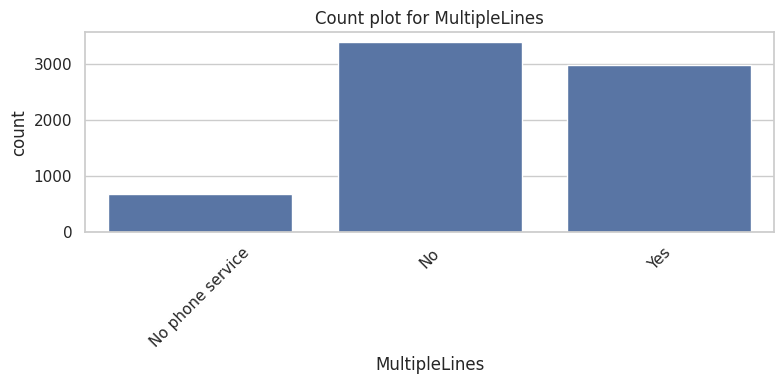

Exploring categorical variable: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


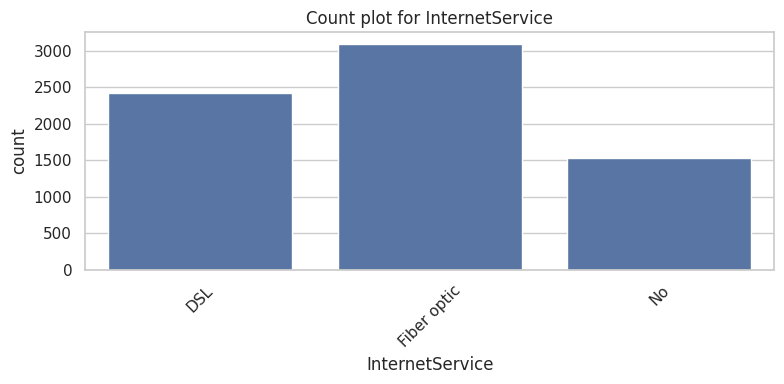

Exploring categorical variable: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


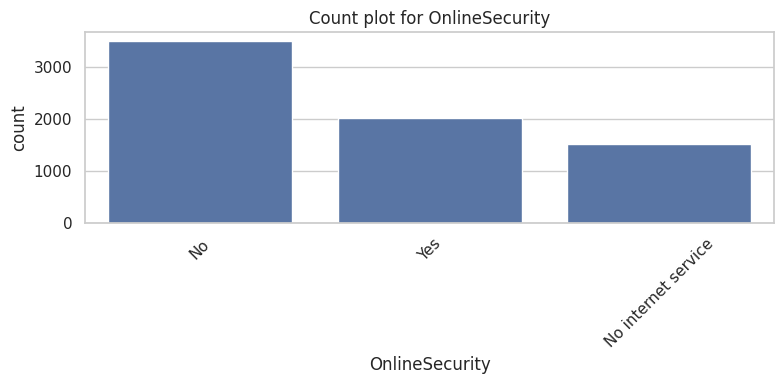

Exploring categorical variable: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


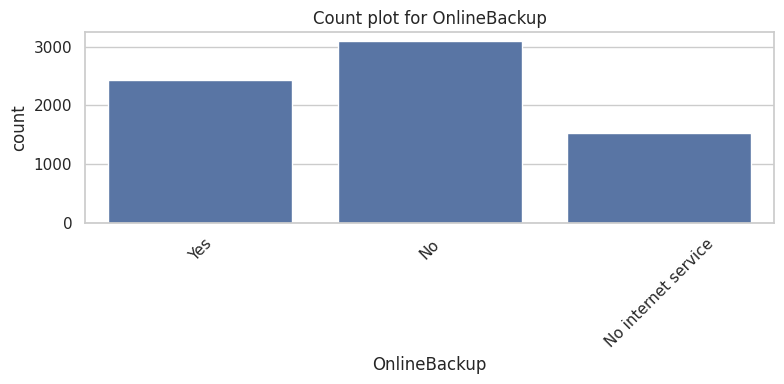

Exploring categorical variable: DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


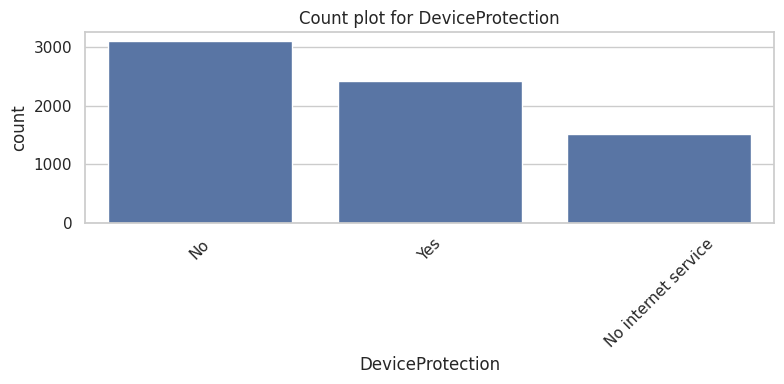

Exploring categorical variable: TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


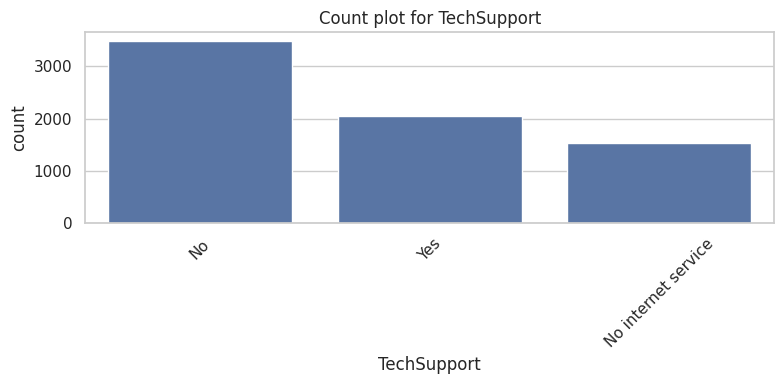

Exploring categorical variable: StreamingTV
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


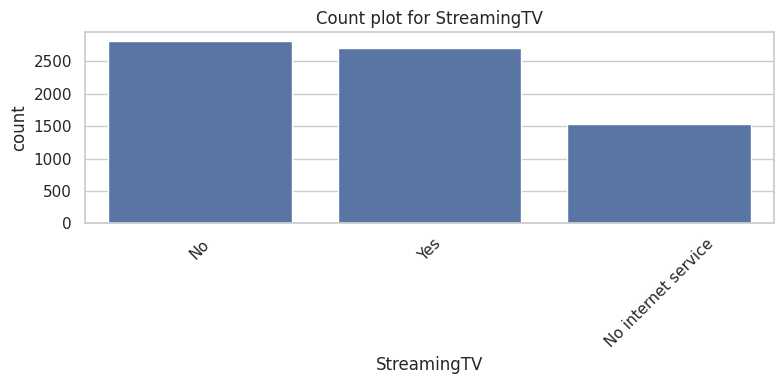

Exploring categorical variable: StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


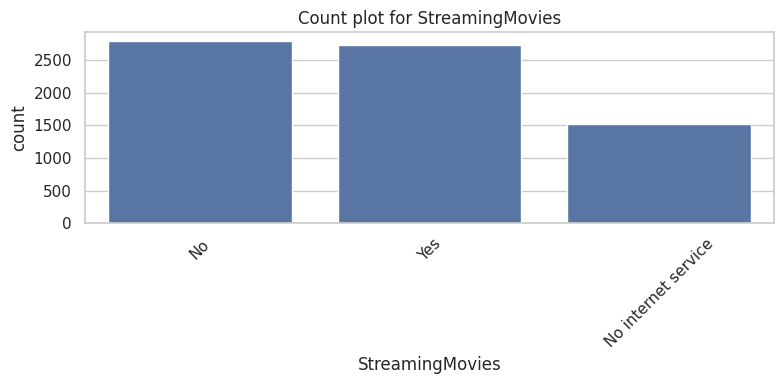

Exploring categorical variable: Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


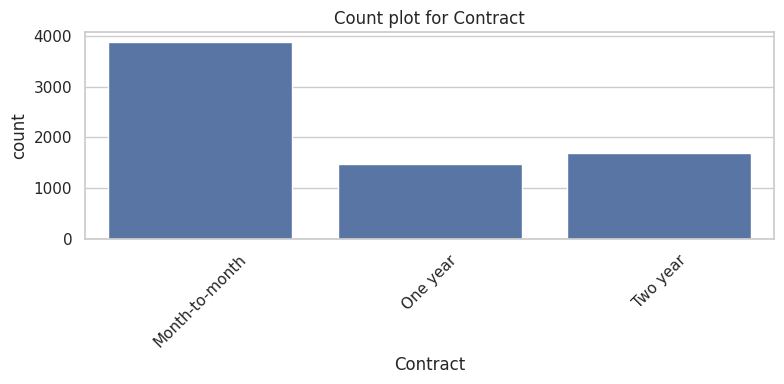

Exploring categorical variable: PaperlessBilling
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


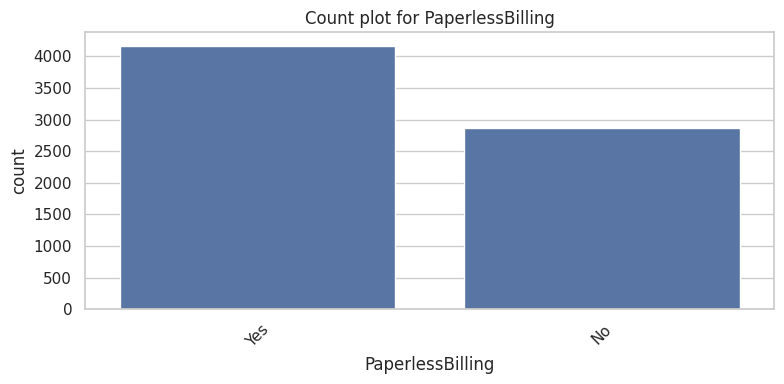

Exploring categorical variable: PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


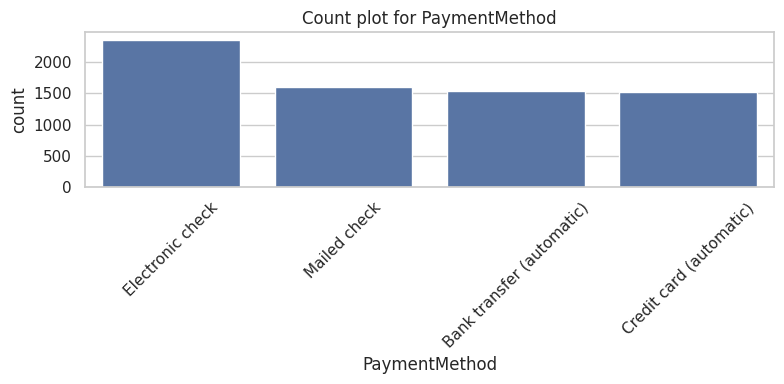


Exploring continuous variable: tenure


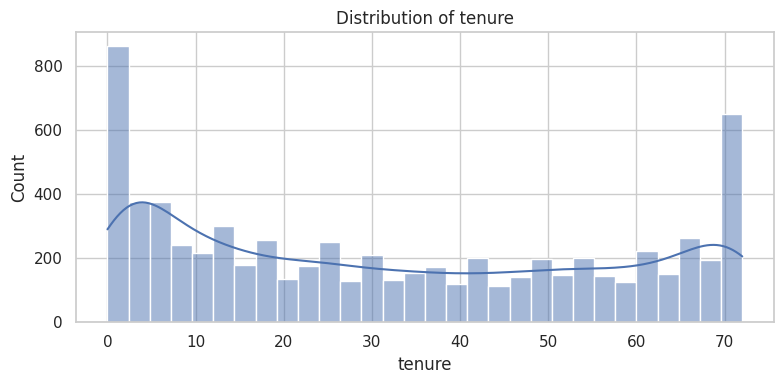


Exploring continuous variable: MonthlyCharges


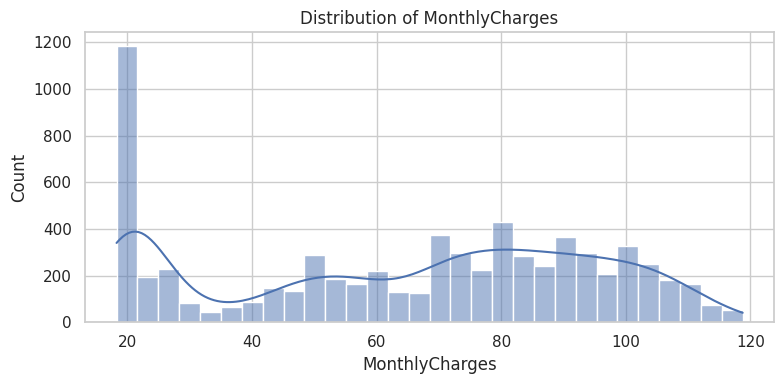


Exploring continuous variable: TotalCharges


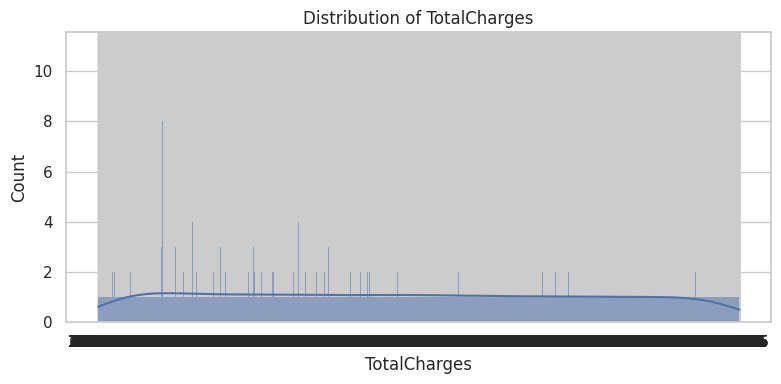

Exploring target outcome variable: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64


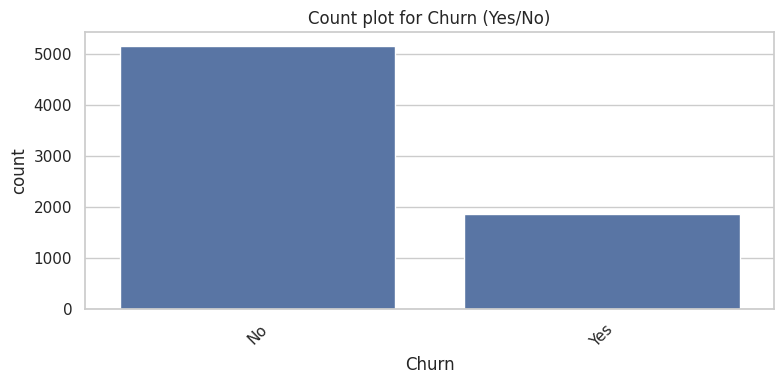

In [9]:
# Set plot style for consistent visualization
sns.set(style="whitegrid")

# Exploring categorical variables
for var in categorical_vars:
    print(f"Exploring categorical variable: {var}")
    print(df[var].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=var)
    plt.title(f'Count plot for {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Exploring continuous variables
for var in continuous_vars:
    print(f"\nExploring continuous variable: {var}")
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

# Exploring target outcome variable (Churn)
print("Exploring target outcome variable: Churn")
print(df['Churn'].value_counts())
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Churn')
plt.title('Count plot for Churn (Yes/No)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Linear Regression

Check Linear Regression Assumptions

● Linearity

● Independence

● Homoscedasticity

● Normality

● No multicollinearity

● No autocorrelation

● No endogeneity

● Correct specification


In [10]:
# Create the linear_churn variable
df['linear_churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the new variable
print(df[['Churn', 'linear_churn']].head())

  Churn  linear_churn
0    No             0
1    No             0
2   Yes             1
3    No             0
4   Yes             1


In [11]:
# One-hot encode only the categorical variables
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

# Add the continuous variables and the target variable 'linear_churn' to the dataframe
df_encoded[continuous_vars] = df[continuous_vars]
df_encoded['linear_churn'] = df['linear_churn']

# Verify the structure of the new dataframe and the first few rows
df_encoded.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,linear_churn
0,0,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,1,29.85,29.85,0
1,0,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,34,56.95,1889.5,0
2,0,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,2,53.85,108.15,1
3,0,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,45,42.30,1840.75,0
4,0,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,2,70.70,151.65,1


In [12]:
# Check the data types of the columns
print(df_encoded.dtypes)

SeniorCitizen                              int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No internet service             bool
StreamingTV_Yes                             bool
StreamingMovies_No internet service         bool
StreamingMovies_Yes 

In [13]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' using the mean
df_encoded['TotalCharges'].fillna(df_encoded['TotalCharges'].mean(), inplace=True)

# Convert boolean columns to int (0 or 1)
df_encoded = df_encoded.astype({col: 'int64' for col in df_encoded.select_dtypes('bool').columns})

In [14]:
# Re-check the data types after conversion and imputation
print(df_encoded.dtypes)

SeniorCitizen                              int64
gender_Male                                int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes                            int64
StreamingTV_No internet service            int64
StreamingTV_Yes                            int64
StreamingMovies_No internet service        int64
StreamingMovies_Yes 

##### Check the Linearity Assumption: Relationship between X and Y should be linear

In [15]:
# Define the predictor variables and target variable
X = df_encoded.drop(columns=['linear_churn'])
y = df_encoded['linear_churn']

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
linear_model = sm.OLS(y, X).fit()

# Print the model summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:           linear_churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     121.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        03:48:26   Log-Likelihood:                -3057.6
No. Observations:                7043   AIC:                             6163.
Df Residuals:                    7019   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

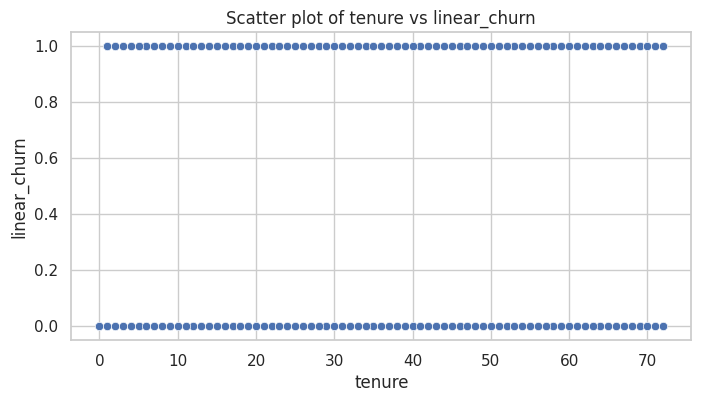

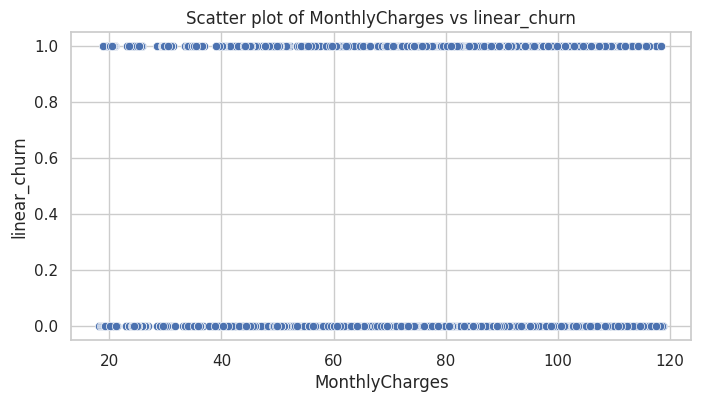

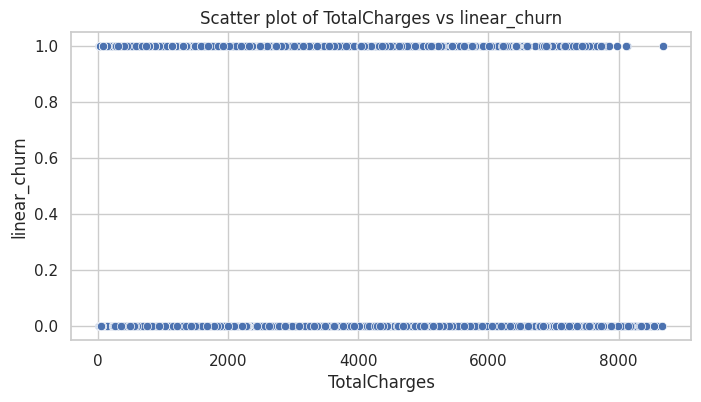

In [16]:
# Check linearity visually for each continuous predictor variable
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_encoded, x=var, y='linear_churn')
    plt.title(f'Scatter plot of {var} vs linear_churn')
    plt.show()

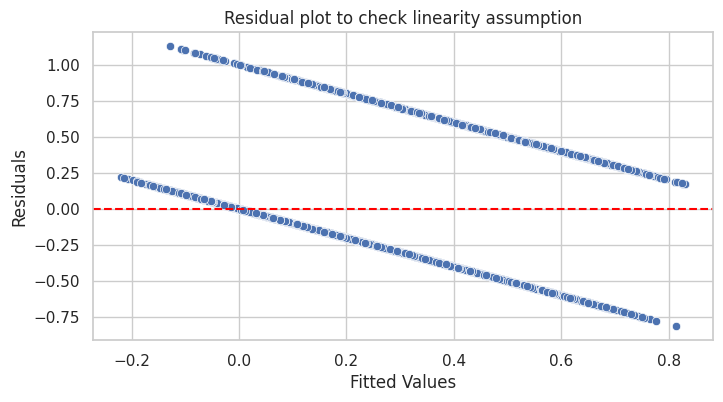

In [17]:
# Residual Plot to check linearity
residuals = linear_model.resid
fitted_values = linear_model.fittedvalues

plt.figure(figsize=(8, 4))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Red line at 0 to check for randomness
plt.title('Residual plot to check linearity assumption')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The linearity assumption is not satisfied because the residuals are not randomly distributed around zero. Therefore, I decide to apply the log transformation to continuous predictor variables because it helps to address non-linear relationships.

In [18]:
# Check if there are any zero values in the tenure, MonthlyCharges, and TotalCharges columns
columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through each column and count the number of zero values
for col in columns_to_check:
    zero_count = (df_encoded[col] == 0).sum()
    print(f"Number of zero values in {col}: {zero_count}")

Number of zero values in tenure: 11
Number of zero values in MonthlyCharges: 0
Number of zero values in TotalCharges: 0


In [19]:
# Apply log transformation to continuous variables
df_encoded['log_tenure'] = np.log(df_encoded['tenure'] + 1) # Apply log transformation to tenure by adding 1 to avoid log(0)
df_encoded['log_MonthlyCharges'] = np.log1p(df_encoded['MonthlyCharges'])
df_encoded['log_TotalCharges'] = np.log1p(df_encoded['TotalCharges'])

#####Check the Independence Assumption: observations should be independent of each other

In [20]:
# Define the predictor variables (use the transformed variables instead of original)
X = df_encoded.drop(columns=['linear_churn', 'tenure', 'MonthlyCharges', 'TotalCharges'])  # Dropping the original untransformed continuous variables
y = df_encoded['linear_churn']

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the linear regression model again
linear_model = sm.OLS(y, X).fit()

# Calculate the residuals
residuals = linear_model.resid

# Durbin-Watson test for autocorrelation of residuals
dw_stat = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print(f"Durbin-Watson statistic: {dw_stat}")

# Interpretation guidelines
if dw_stat < 1.5:
    print("Residuals are not independent")
elif dw_stat > 2.5:
    print("Residuals are not independent")
else:
    print("Residuals appear to be independent")


Durbin-Watson statistic: 2.0130970056104602
Residuals appear to be independent


Since the Durbin-Watson statistic is around 2, the residuals are independent, thus the independence assumption is not violated.

##### Check the Homoscedasticity Assumption: constant variance of residuals across all levels of X

In [21]:
# Run Breusch-Pagan test
bp_test = het_breuschpagan(linear_model.resid, linear_model.model.exog)

# Extract the p-value from the test result
bp_pvalue = bp_test[1]

print(f"Breusch-Pagan test p-value: {bp_pvalue}")

# Interpretation
if bp_pvalue < 0.05:
    print("The p-value is below 0.05, indicating heteroscedasticity (non-constant variance of residuals).")
else:
    print("The p-value is above 0.05, indicating homoscedasticity (constant variance of residuals).")

Breusch-Pagan test p-value: 7.349799638295247e-262
The p-value is below 0.05, indicating heteroscedasticity (non-constant variance of residuals).


Since there's heteroscedasticity (non-constant variance of residuals), I want to perform a log transformation on y value. However, since I'm working with a binary outcome (linear_churn, which is either 0 or 1), applying a log transformation to this variable is not appropriate, because log(0) is undefined, and binary variables don't usually benefit from log transformations. In this case, it's better to use logistic regression, which I will try as my second modeling strategy.

##### Check Normality Assumption: Residuals should be normally distributed.

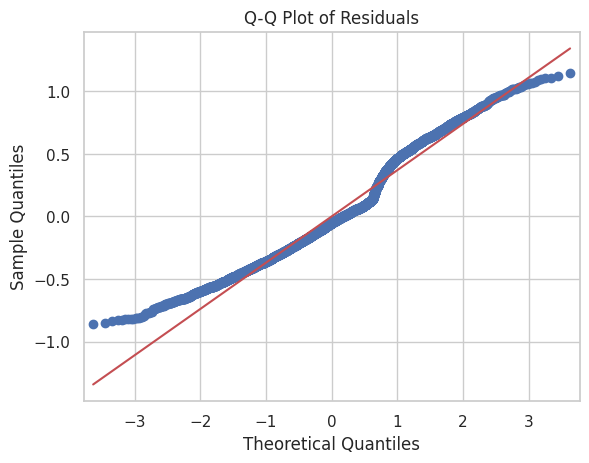

In [22]:
#Q-Q plot to check normality
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

The points lie roughly along the 45-degree line on the Q-Q plot. Thus, the residuals are normally distributed. The normality assumption is not violated.

##### Check the No Multicollinearity Assumption: No perfect linear relationships among predictors

VIF cutoffs rule:

1: not correlated

Between 1 and 5: moderately correlated

Greater than 5: highly correlated

Greater than 10: highly correlated and we want to do sth about it

In [23]:
# Drop the constant column from X because VIF does not require an intercept
X_no_const = X.drop(columns=['const'], errors='ignore')

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

# Display the VIF values
print(vif_data)

                                 Variable          VIF
0                           SeniorCitizen     1.152977
1                             gender_Male     1.001479
2                             Partner_Yes     1.451488
3                          Dependents_Yes     1.383119
4                        PhoneService_Yes  4410.813440
5          MultipleLines_No phone service   382.627676
6                       MultipleLines_Yes     1.961701
7             InternetService_Fiber optic    10.274151
8                      InternetService_No          inf
9      OnlineSecurity_No internet service          inf
10                     OnlineSecurity_Yes     1.722068
11       OnlineBackup_No internet service          inf
12                       OnlineBackup_Yes     1.636123
13   DeviceProtection_No internet service          inf
14                   DeviceProtection_Yes     1.796404
15        TechSupport_No internet service          inf
16                        TechSupport_Yes     1.776634
17        

There are multicollinearity issues in some of the variables.

VIF > 10: Indicates problematic multicollinearity.

- PhoneService_Yes (4410.81)
- MultipleLines_No phone service (382.63)
- InternetService_Fiber optic (10.27)
- log_tenure (39.47)
- log_MonthlyCharges (118.85)
- log_TotalCharges (52.63)

Infinite VIF (inf): Several of your categorical variables (e.g., InternetService_No, OnlineSecurity_No internet service, etc.) have infinite VIF values. This suggests that these variables are perfectly collinear with other predictors.

In order to solve multicollinearity, I decide to use lasso which performs feature selection by shrinking some coefficients exactly to zero and regularization of the selected feature weights when applied to a linear regression model.


##### Check the No Autocorrelation Assumption: Residuals should not be correlated over time

In [24]:
# Durbin-Watson test for autocorrelation of residuals
dw_stat = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print(f"Durbin-Watson statistic: {dw_stat}")

# Interpretation guidelines
if dw_stat < 1.5:
    print("Potential positive autocorrelation")
elif dw_stat > 2.5:
    print("Potential negative autocorrelation")
else:
    print("No autocorrelation")


Durbin-Watson statistic: 2.0130970056104602
No autocorrelation


Since the Durbin-Watson statistic is around 2, there's no autocorrelation, thus the no autocorrelation assumption is not violated.

##### Check the No Endogeneity Assumption

- Endogenous Variable (X1): MonthlyCharges

MonthlyCharges could be endogenous due to the possibility that it’s influenced by unobserved factors like customer satisfaction or the churn decision itself.

- Exogenous Variables (X2, X3, etc.): tenure, SeniorCitizen, Partner_Yes

These demographic factors are likely exogenous because they are less likely to be influenced by churn directly.

- Instrument (Z1): Contract

Contract type (e.g., whether a customer has a one-year, two-year, or month-to-month contract) could affect MonthlyCharges but is not likely to be correlated with the error term (assuming contract type does not directly influence churn beyond its effect on charges).

In [25]:
# Define predictors (X) and the instrument (Z)
X = df_encoded[['MonthlyCharges', 'tenure', 'SeniorCitizen', 'Partner_Yes']]  # MonthlyCharges as potentially endogenous
y = df_encoded['linear_churn']  # Dependent variable
Z = df_encoded['Contract_Two year']  # Instrumental variable

# Fit the OLS model (ignore endogeneity for now)
ols_model = sm.OLS(y, X).fit()

# Fit the IV regression model (2-Stage Least Squares)
iv_model = IV2SLS(dependent=y, exog=X[['tenure', 'SeniorCitizen', 'Partner_Yes']], endog=X['MonthlyCharges'], instruments=Z).fit()

# Hausman Test to compare OLS and IV estimates
ols_params = ols_model.params
iv_params = iv_model.params

# Calculate the difference between OLS and IV estimates
diff = ols_params - iv_params

# Extract the covariance matrices from OLS and IV models
# For OLS, use `cov_params()`
ols_cov = ols_model.cov_params()

# For IV, use the `cov` attribute
iv_cov = iv_model.cov

# Calculate the difference in covariance matrices
var_diff = ols_cov - iv_cov

# Hausman test statistic (Wald test)
hausman_stat = np.dot(np.dot(diff.T, np.linalg.inv(var_diff)), diff)

# Use chi2.sf to calculate the p-value
p_value = chi2.sf(hausman_stat, df=len(diff))

print(f"Hausman Test Statistic: {hausman_stat}")
print(f"p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("Endogeneity detected (Reject null hypothesis of exogeneity)")
else:
    print("No endogeneity detected (Fail to reject null hypothesis of exogeneity)")

Hausman Test Statistic: -3.4321045676558004
p-value: 1.0
No endogeneity detected (Fail to reject null hypothesis of exogeneity)


Since the Hausamn test with p-value=1.0 indicates that no endogeneity is detected, the endogeneity assumption holds.

##### Check Correct Specification Assumption

In [26]:
# Define the predictor and outcome variables
X = df_encoded.drop(columns=['linear_churn', 'tenure', 'MonthlyCharges', 'TotalCharges'])  # Dropping the original untransformed continuous variables
y = df_encoded['linear_churn']

# Fit OLS model
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()

# Ramsey RESET Test
reset_test = linear_reset(ols_model, power=2, use_f=True)  # Using power=2 for squared terms
print("Ramsey RESET Test:")
print(f"F-statistic: {reset_test.fvalue}, p-value: {reset_test.pvalue}")

# Interpretation:
if reset_test.pvalue < 0.05:
    print("Model misspecified (Reject null hypothesis)")
else:
    print("Model correctly specified (Fail to reject null hypothesis)")

Ramsey RESET Test:
F-statistic: 197.09588267382367, p-value: 3.544584994924331e-44
Model misspecified (Reject null hypothesis)


The p-value is less than 0.05, meaning the model is likely misspecified.In order to solve this issue, I will add interactions terms

Interaction Term:
- tenure * MonthlyCharges: Captures how the relationship between tenure and churn changes at different monthly charge levels. Customers who have been with the company for a long time and pay higher charges might behave differently from those with shorter tenure and higher charges. For instance, long-tenured customers with high monthly charges might be less likely to churn due to higher perceived value or stronger loyalty, whereas short-tenured customers with high monthly charges might churn quickly due to dissatisfaction with costs.

- Partner_Yes * MonthlyCharges: Reflects how customers with partners might react differently to higher monthly charges compared to those without. For example, customers who have partners may have different price sensitivities than those who don’t. Higher charges for customers with partners might indicate family plans, which could be perceived differently from high charges for single customers, potentially affecting churn behavior differently.

- SeniorCitizen * MonthlyCharges: Captures how senior citizens might react differently to monthly charges compared to younger customers. Senior citizens could be more price-sensitive, and higher monthly charges might disproportionately affect their decision to churn.

- tenure * Partner_Yes: Reflects differences in churn behavior between long-tenured customers with partners versus those without. For example, customers with partners and longer tenure might show higher loyalty and be less likely to churn compared to single, long-tenured customers. Conversely, newer customers with partners might behave differently from single, newer customers.

- tenure * SeniorCitizen: Captures differences in churn behavior between senior citizens with long tenure and younger customers with long tenure. Senior citizens with long tenure might be more loyal due to familiarity with the service, while younger customers with long tenure might have different reasons for staying or leaving.

- SeniorCitizen * Partner_Yes: Captures differences in churn behavior between senior citizens with partners versus senior citizens without. For example, senior citizens with partners might be more stable in their relationship with the company, while single senior citizens might be more prone to churn.


In [27]:
# Add interaction terms to the dataset
df_encoded['tenure_MonthlyCharges_interaction'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']
df_encoded['Partner_Yes_MonthlyCharges_interaction'] = df_encoded['Partner_Yes'] * df_encoded['MonthlyCharges']
df_encoded['SeniorCitizen_MonthlyCharges_interaction'] = df_encoded['SeniorCitizen'] * df_encoded['MonthlyCharges']
df_encoded['tenure_Partner_Yes_interaction'] = df_encoded['tenure'] * df_encoded['Partner_Yes']
df_encoded['tenure_SeniorCitizen_interaction'] = df_encoded['tenure'] * df_encoded['SeniorCitizen']
df_encoded['SeniorCitizen_Partner_Yes_interaction'] = df_encoded['SeniorCitizen'] * df_encoded['Partner_Yes']

#### Linear Regression Modeling (Lasso + log transformed x + interaction terms)

In [28]:
# Print each column in the df_encoded dataframe for doubel checking
print("Columns in df_encoded:")
for col in df_encoded.columns:
    print(col)

Columns in df_encoded:
SeniorCitizen
gender_Male
Partner_Yes
Dependents_Yes
PhoneService_Yes
MultipleLines_No phone service
MultipleLines_Yes
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No internet service
StreamingMovies_Yes
Contract_One year
Contract_Two year
PaperlessBilling_Yes
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
tenure
MonthlyCharges
TotalCharges
linear_churn
log_tenure
log_MonthlyCharges
log_TotalCharges
tenure_MonthlyCharges_interaction
Partner_Yes_MonthlyCharges_interaction
SeniorCitizen_MonthlyCharges_interaction
tenure_Partner_Yes_interaction
tenure_SeniorCitizen_interaction
SeniorCitizen_Partner_Yes_interaction


In [29]:
X_train_linear=df_encoded.drop(columns=['linear_churn','tenure', 'MonthlyCharges', 'TotalCharges'])
y_train_linear=df_encoded['linear_churn']

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_train_linear, y_train_linear, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_linear = scaler.fit_transform(X_train_linear)
X_test_scaled_linear = scaler.transform(X_test_linear)

In [30]:
# Define the function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_names):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Print the coefficients
    print("\nRegression Coefficients:")
    for feature, coef in zip(feature_names, model.coef_):
        print(f"{feature}: {coef:.4f}")

    # Identify and print non-zero coefficients (important features)
    non_zero_coefficients = {feature: coef for feature, coef in zip(feature_names, model.coef_) if coef != 0}

    # Sort by absolute value of coefficients
    important_features = sorted(non_zero_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

    print("\nMost Important Features (non-zero coefficients):")
    for feature, coef in important_features:
        print(f"{feature}: {coef:.4f}")

    # Extract sorted features and coefficients
    feature_names_sorted, coef_values_sorted = zip(*important_features)

    # Create a DataFrame of sorted coefficients for plotting
    sorted_coefficients = pd.Series(coef_values_sorted, index=feature_names_sorted).sort_values(ascending=False, key=abs)

    # Map the sign of coefficients to colors (blue for positive, orange for negative)
    colors = ['blue' if coef > 0 else 'orange' for coef in sorted_coefficients]

    # Plot the non-zero coefficients with color mapping
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette=colors)
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.tight_layout()

    # Add small labels for each bar
    for i, bar in enumerate(ax.patches):
        coef = sorted_coefficients.values[i]
        ax.text(
            bar.get_width() + np.sign(bar.get_width()) * 0.05,  # Position of the text (slightly outside the bar)
            bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
            f'{coef:.2f}',  # Format the coefficient with 2 decimal points
            va='center', ha='center', fontsize=8  # Set small font size
        )

    plt.show()

    return model, y_pred



Lasso Regression:
MSE: 0.17
R2 Score: 0.15

Regression Coefficients:
SeniorCitizen: 0.0000
gender_Male: -0.0000
Partner_Yes: -0.0000
Dependents_Yes: -0.0000
PhoneService_Yes: -0.0000
MultipleLines_No phone service: 0.0000
MultipleLines_Yes: 0.0000
InternetService_Fiber optic: 0.0324
InternetService_No: -0.0000
OnlineSecurity_No internet service: -0.0000
OnlineSecurity_Yes: -0.0000
OnlineBackup_No internet service: -0.0000
OnlineBackup_Yes: -0.0000
DeviceProtection_No internet service: -0.0000
DeviceProtection_Yes: -0.0000
TechSupport_No internet service: -0.0000
TechSupport_Yes: -0.0000
StreamingTV_No internet service: -0.0000
StreamingTV_Yes: 0.0000
StreamingMovies_No internet service: -0.0000
StreamingMovies_Yes: 0.0000
Contract_One year: -0.0000
Contract_Two year: -0.0000
PaperlessBilling_Yes: 0.0000
PaymentMethod_Credit card (automatic): -0.0000
PaymentMethod_Electronic check: 0.0085
PaymentMethod_Mailed check: -0.0000
log_tenure: -0.0616
log_MonthlyCharges: 0.0000
log_TotalCharge

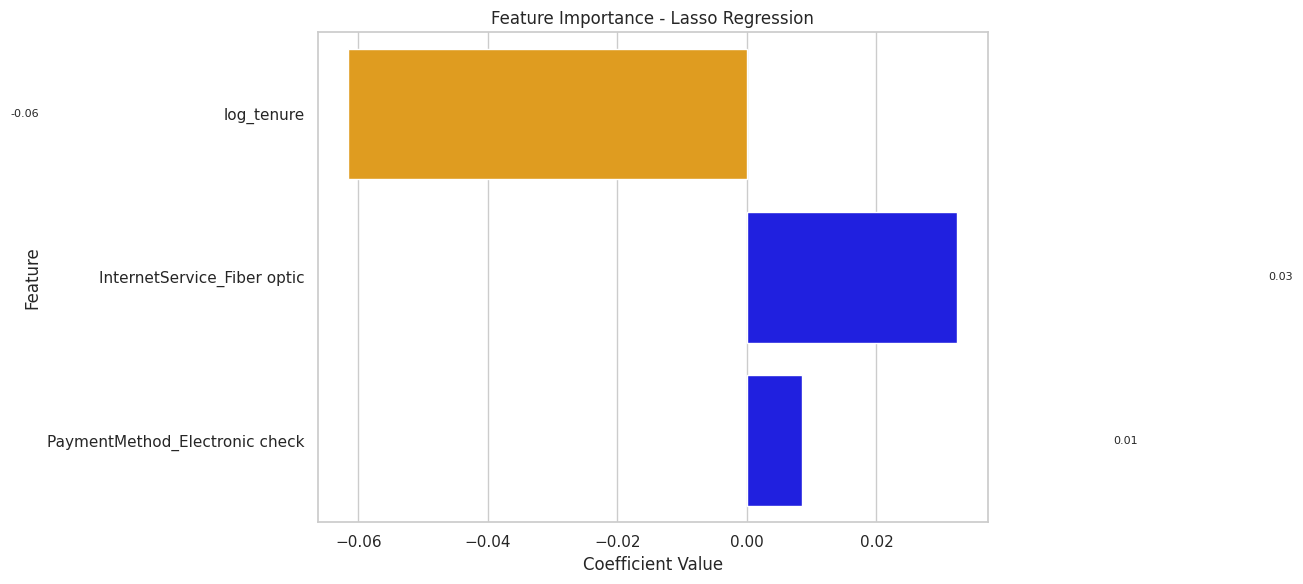

In [31]:
# Call the evaluate_model function with Lasso regression
lasso_model, lasso_pred = evaluate_model(
    Lasso(alpha=0.1),
    X_train_scaled_linear,
    X_test_scaled_linear,
    y_train_linear,
    y_test_linear,
    "Lasso Regression",
    X_train_linear.columns  # Pass the original column names here
)

Interpretation of non-zero coefficients (Most important features):

- log_tenure: As the log of tenure increases by 1 unit, the likelihood of churn decreases by 0.0616, holding all other factors constant.

- InternetService_Fiber optic: The increase in churn on average is 0.0324 for someone using fiber optic as internet service compare to someone using DSL as internet service, holding all other factors constant.

- PaymentMethod_Electronic check: The increase in churn on average is 0.0085 for someone using electronic check as payment method compare to someone using bank transfer (automatic) as payment method, holding all other factors constant.

Linear Regression Model Evaluation:

- MSE measures the average squared difference between the actual true values and the predicted values (churn) by the model. A MSE of 0.17 is relatively low, which means better performance because the predictions are closer to the actual values.

- R² represents the proportion of variance in the dependent variable (churn) that is explained by the independent variables. The R² score of 0.15 means that the model explains 15% of the variance in the target variable (churn). This is a low value, indicating that the model is not capturing much of the underlying structure in the data.

- In summary, Low MSE indicates that the model is making accurate predictions (small errors), but low R² suggests that the model isn’t explaining much of the variability in the target variable. This could be due to that the linear regression model is an overly simplistic model that isn’t capturing enough complexity (for instance, non-linear relationship).

### Logistic Regression



Check Logistic Regression Assumptions

● Linearity

● No multicollinearity

● Independence of observations

● No influential outliers

● Absence of perfect separation

● Large sample size


In [32]:
# Create the logistic_churn variable (binary target variable)
df['logistic_churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the new target variable
print(df[['Churn', 'logistic_churn']].head())

  Churn  logistic_churn
0    No               0
1    No               0
2   Yes               1
3    No               0
4   Yes               1


In [33]:
# One-hot encode only the categorical variables
df_encoded_logistic = pd.get_dummies(df[categorical_vars], drop_first=True)

# Add the continuous variables and the target variable 'logistic_churn' to the dataframe
df_encoded_logistic[continuous_vars] = df[continuous_vars]  # Add continuous variables
df_encoded_logistic['logistic_churn'] = df['logistic_churn']  # Add target variable

# Verify the structure of the new dataframe and the first few rows
df_encoded_logistic.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,logistic_churn
0,0,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,1,29.85,29.85,0
1,0,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,34,56.95,1889.5,0
2,0,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,2,53.85,108.15,1
3,0,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,45,42.30,1840.75,0
4,0,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,2,70.70,151.65,1


In [34]:
# Check the data types of the columns
print(df_encoded_logistic.dtypes)

SeniorCitizen                              int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No internet service             bool
StreamingTV_Yes                             bool
StreamingMovies_No internet service         bool
StreamingMovies_Yes 

In [35]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df_encoded_logistic['TotalCharges'] = pd.to_numeric(df_encoded_logistic['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' using the mean
df_encoded_logistic['TotalCharges'].fillna(df_encoded_logistic['TotalCharges'].mean(), inplace=True)

# Convert boolean columns to int (0 or 1)
df_encoded_logistic = df_encoded_logistic.astype({col: 'int64' for col in df_encoded_logistic.select_dtypes('bool').columns})

In [36]:
# Re-check the data types after conversion and imputation
print(df_encoded_logistic.dtypes)

SeniorCitizen                              int64
gender_Male                                int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes                            int64
StreamingTV_No internet service            int64
StreamingTV_Yes                            int64
StreamingMovies_No internet service        int64
StreamingMovies_Yes 

##### Check Linearity Assumptions: Relationship between X and Y should be linear

In [37]:
# Define the predictor variables (continuous variables) and target variable
X = df_encoded_logistic[continuous_vars]
y = df_encoded_logistic['logistic_churn']

# Add a constant to the predictors
X_plus_const = sm.add_constant(X)

# Fit the initial logistic regression model
logit_model = sm.Logit(y, X_plus_const).fit()

# Print the summary of the initial model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.453766
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         logistic_churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.2158
Time:                        03:48:34   Log-Likelihood:                -3195.9
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6784      0.115    -14.589      0.000      -1.904      -1.453
tenure           

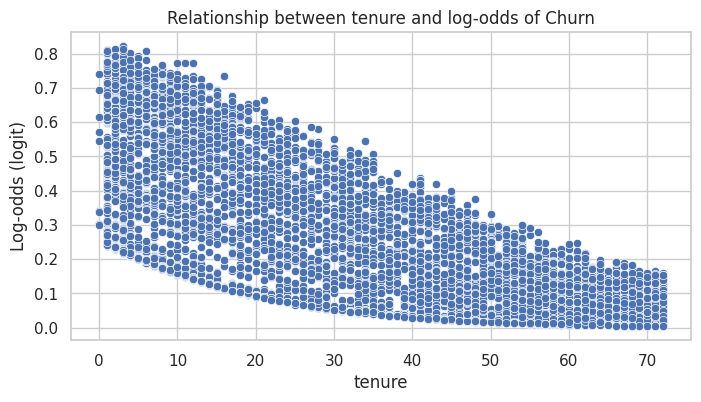

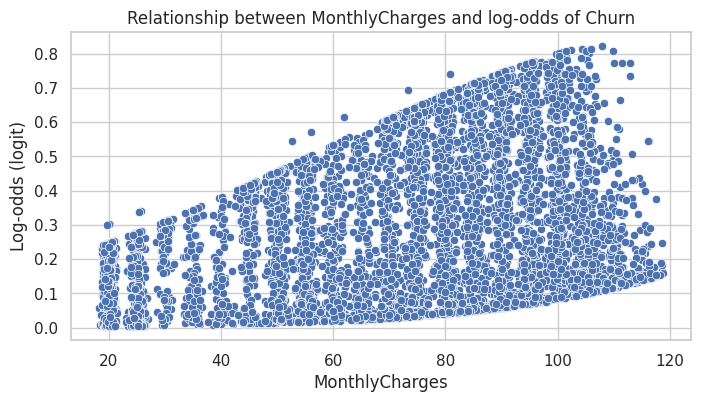

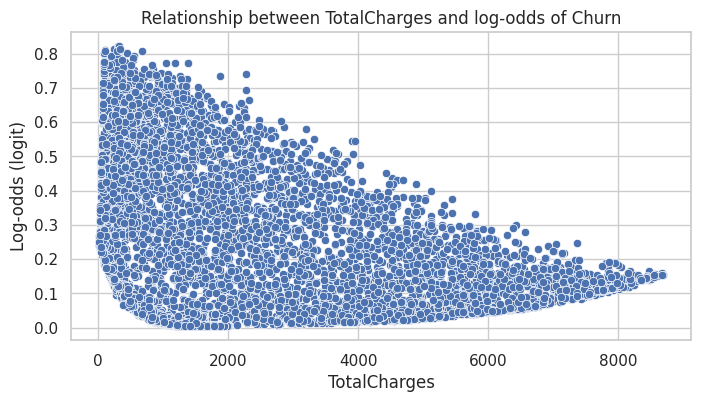

In [38]:
# Predict the log-odds (logit) from the logistic regression model
logit_values = logit_model.predict(X_plus_const)

# Plot the relationship between each continuous variable and the log-odds
for col in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df_encoded_logistic[col], y=logit_values)
    plt.title(f'Relationship between {col} and log-odds of Churn')
    plt.xlabel(col)
    plt.ylabel('Log-odds (logit)')
    plt.show()

In [39]:
# Create interaction terms between continuous variables and their log-transformed values
X_transformed = X.copy()
for col in continuous_vars:
    X_transformed[f'{col}_log'] = X[col] * np.log(X[col] + 1e-5)  # Adding small constant to avoid log(0)

# Add constant to the transformed variables
X_transformed = sm.add_constant(X_transformed)

# Fit a new logistic regression model with the original and transformed interaction terms
logit_transformed_model = sm.Logit(y, X_transformed).fit()

# Print the summary of the transformed model to check the significance of interaction terms
print(logit_transformed_model.summary())

Optimization terminated successfully.
         Current function value: 0.450017
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         logistic_churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7036
Method:                           MLE   Df Model:                            6
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.2222
Time:                        03:48:38   Log-Likelihood:                -3169.5
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2013      0.337     -3.564      0.000      -1.862      -0.541
tenur

The Box-Tidwell test indicates that

- Linearity assumption is violated for tenure: Since the log-interaction term for tenure is significant (p-value < 0.05), it suggests that the relationship between tenure and the log-odds of churn is non-linear. A more flexible modeling technique such as GAMs may be better to account for this non-linearity, which I will try later for my modeling.

- Linearity assumption holds for MonthlyCharges: The log-interaction term is not significant (p-value > 0.05), so the linearity assumption holds for this variable.

- Linearity assumption holds for TotalCharges: The log-interaction term is not significant (p-value > 0.05), so the linearity assumption holds for this variable.

For my next step, I'm going to apply log transformation to "tenure" to addrress non-linearity in the logistic regression.

In [40]:
#Apply log transformation to tenure (adding a small constant to avoid log(0))
df_encoded_logistic['log_tenure'] = np.log(df_encoded_logistic['tenure'] + 1)

##### Check the No Multicollinearity assumption: No perfect linear relationship among predictors

In [41]:
# Define the predictor variables (replace original tenure with log_tenure)
X = df_encoded_logistic.drop(columns=['tenure', 'logistic_churn'])
y = df_encoded_logistic['logistic_churn']  # Binary target variable

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                                 Variable          VIF
0                           SeniorCitizen     1.153255
1                             gender_Male     1.002167
2                             Partner_Yes     1.461201
3                          Dependents_Yes     1.383714
4                        PhoneService_Yes  1779.432854
5          MultipleLines_No phone service    61.751028
6                       MultipleLines_Yes     7.284024
7             InternetService_Fiber optic   148.278426
8                      InternetService_No          inf
9      OnlineSecurity_No internet service          inf
10                     OnlineSecurity_Yes     6.337311
11       OnlineBackup_No internet service          inf
12                       OnlineBackup_Yes     6.785011
13   DeviceProtection_No internet service          inf
14                   DeviceProtection_Yes     6.922254
15        TechSupport_No internet service          inf
16                        TechSupport_Yes     6.462351
17        

There are multicollinearity issues in some of the variables.

VIF > 10: Indicates problematic multicollinearity.

- PhoneService_Yes (1779.432854)
- MultipleLines_No phone service (61.751028)
- InternetService_Fiber optic (148.278426)
- StreamingTV_Yes (24.060008)
- StreamingMovies_Yes (24.113226)
- MonthlyCharges (864.317192)

Infinite VIF (inf):

Variables with infinite VIF are perfectly collinear with other variables:
- InternetService_No
- OnlineSecurity_No internet service
- OnlineBackup_No internet service
- DeviceProtection_No internet service
- TechSupport_No internet service
- StreamingTV_No internet service
- StreamingMovies_No internet service

In order to solve multicollinearity, I decide to use lasso which performs feature selection by shrinking some coefficients exactly to zero and regularization of the selected feature weights when applied to a logistic regression model.

##### Check the Independence of Observations Assumptions: Observations should be independent of each other

I assume that observations are independent by design since there are no time-dependent variables or clustering effects in the dataset. This means that there should be no correlation between the observations.

##### Check the No Influential Outliers Assumptions

- Cook's Distance: Measures the influence of each observation on the fitted model. A common rule of thumb is that Cook’s Distance greater than 4/n (where n is the number of observations) indicates potential influential points.
- Leverage (Hat Values): Measures how far an observation is from the average of the predictor variables. High leverage points can have a large effect on the model's predictions. A common threshold is 3 times the mean leverage. Points above this threshold can be considered high leverage points, which means they have the potential to unduly influence the model's results.
- Identify influential points: Observations that have Cook's Distance > 4/n or Leverage > 3 * mean leverage are identified as influential points.



Optimization terminated successfully.
         Current function value: 0.407227
         Iterations 8


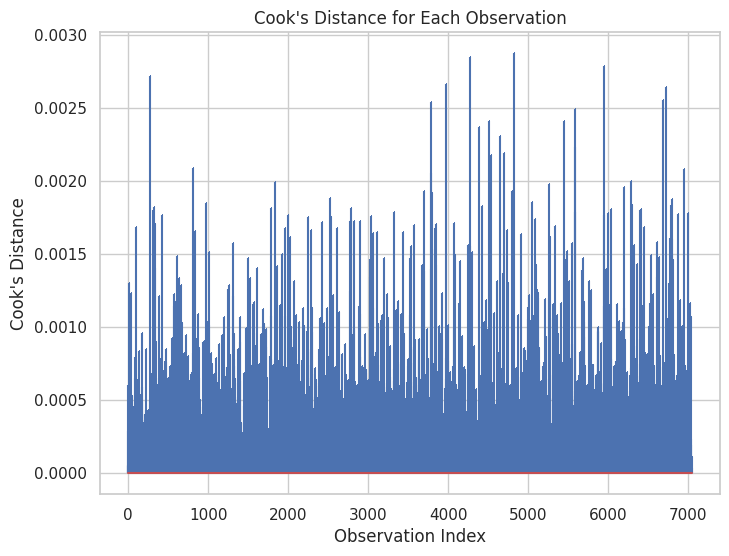

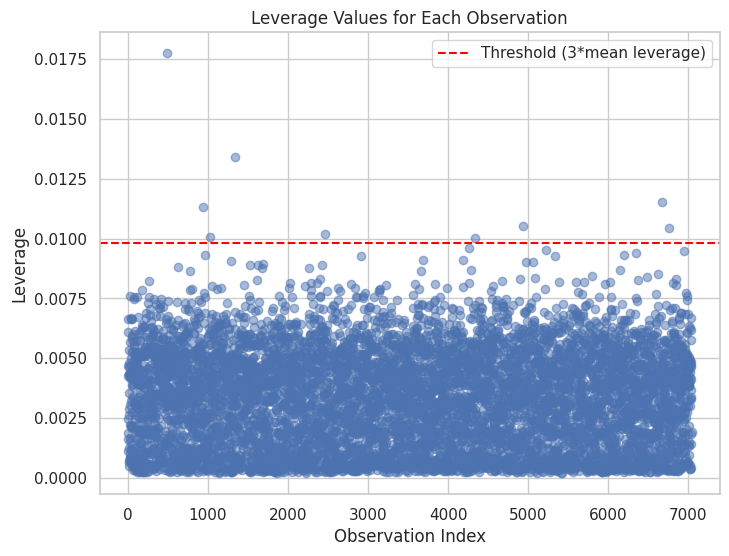

Influential Points: [   2   18   22   29   31   85   91   97  104  110  115  141  173  178
  223  268  284  289  293  302  317  320  335  336  345  352  358  385
  397  402  418  430  433  448  459  469  479  488  495  515  518  532
  546  573  580  595  609  611  624  629  638  641  654  658  668  678
  705  710  727  728  730  741  754  772  774  785  799  810  811  825
  828  830  842  855  868  886  889  935  936  965  966  975  995  996
 1014 1015 1022 1029 1039 1043 1049 1077 1095 1097 1102 1113 1131 1147
 1171 1181 1189 1202 1211 1232 1244 1259 1261 1263 1266 1268 1282 1299
 1306 1314 1319 1324 1327 1338 1339 1340 1376 1395 1396 1397 1446 1458
 1465 1469 1477 1482 1486 1494 1522 1526 1547 1550 1555 1568 1575 1577
 1578 1592 1596 1603 1612 1624 1632 1639 1644 1655 1658 1673 1676 1686
 1701 1707 1710 1719 1720 1724 1736 1779 1780 1784 1786 1813 1823 1837
 1840 1856 1859 1883 1897 1903 1904 1916 1927 1928 1929 1950 1965 1967
 1980 1981 1987 1988 2003 2005 2012 2019 2029 2036 2037 2

In [42]:
# Based on VIF results, remove the variables that are perfectly collinear
X = df_encoded_logistic.drop(columns=[
    'tenure', 'logistic_churn', 'InternetService_No', 'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
    'TechSupport_No internet service', 'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
])

y = df_encoded_logistic['logistic_churn']  # Binary target variable

# Add a constant (intercept) to the predictors
X_with_const = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_with_const).fit()

# Calculate influence measures (Cook's Distance, Leverage)
influence = logit_model.get_influence()

# Extract Cook's Distance and Leverage values
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag

# Plot Cook's Distance to detect influential observations
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Plot Leverage values to detect high leverage points
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(leverage)), leverage, alpha=0.5)
plt.axhline(3 * np.mean(leverage), color='red', linestyle='--', label="Threshold (3*mean leverage)")
plt.title('Leverage Values for Each Observation')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.legend()
plt.show()

# Identify influential points (Cook's Distance > 4/n, Leverage > 3*mean leverage)
n = X_with_const.shape[0]  # Number of observations
influential_points = np.where((cooks_d > 4 / n) | (leverage > 3 * np.mean(leverage)))[0]

print(f"Influential Points: {influential_points}")

As it shows, there are some influential points. I'll use robust logistic regression techniques that reduce the influence of outliers without discarding them.

##### Check the Absence of perfect seperation assumption

In [43]:
# Add a constant (intercept) to the predictors
X_with_const = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_with_const)

# Try fitting the model and catch any warnings or errors
try:
    logit_result = logit_model.fit()
    print(logit_result.summary())

    # Check for extreme coefficient values
    print("\nModel Coefficients:")
    print(logit_result.params)

    # Check predicted probabilities
    predicted_probs = logit_result.predict(X_with_const)

    # Print cases with predicted probabilities of exactly 0 or 1
    perfect_separation_cases = np.where((predicted_probs == 0) | (predicted_probs == 1))[0]
    if len(perfect_separation_cases) > 0:
        print(f"\nPotential perfect separation detected in these cases (indices): {perfect_separation_cases}")
    else:
        print("\nNo perfect separation detected based on predicted probabilities.")

except Exception as e:
    print(f"\nModel fitting failed. Error: {e}")


Optimization terminated successfully.
         Current function value: 0.407227
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         logistic_churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7019
Method:                           MLE   Df Model:                           23
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.2962
Time:                        03:48:45   Log-Likelihood:                -2868.1
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2809   2.3

There's no perfect seperation detected based on predicted probabilities, thus the absense of perfect seperation assumption holds.

##### Check for large sample size assumption

A general rule of thumb is to have at least 10-15 observations per predictor (independent variable) in the dataset to fulfill the large sample size assumption.


In [44]:
# Get the number of observations and number of predictor variables
n_observations = df.shape[0]  # Number of rows (observations)
n_predictors = df.drop(columns=['Churn', 'customerID', 'linear_churn', 'logistic_churn']).shape[1]  # Exclude outcome variable and customerID

# Calculate the ratio of observations per predictor
obs_per_predictor_ratio = n_observations / n_predictors

# Set the threshold for a sufficient number of observations per predictor
threshold = 15

# Print the result
print(f"Number of observations: {n_observations}")
print(f"Number of predictors: {n_predictors}")
print(f"Observations per predictor: {obs_per_predictor_ratio:.2f}")

# Interpretation
if obs_per_predictor_ratio >= threshold:
    print(f"The large sample size assumption is satisfied with {obs_per_predictor_ratio:.2f} observations per predictor.")
else:
    print(f"The large sample size assumption is not satisfied. Consider increasing the sample size or reducing the number of predictors.")


Number of observations: 7043
Number of predictors: 19
Observations per predictor: 370.68
The large sample size assumption is satisfied with 370.68 observations per predictor.


Large Sample Size Assumption is satisfied.

##### Logistic Regression (Robust logistic regression+ lasso + log transformed x)

In [45]:
#check columns
df_encoded_logistic.columns

Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges', 'logistic_churn',
       'log_tenure'],
      dtype='object')

In [46]:
# Define the predictor variables and target variable
X_logistic_regression = df_encoded_logistic.drop(columns=['logistic_churn', 'tenure'])
y_logistic_regression = df_encoded_logistic['logistic_churn']  # Binary target variable

# Split data into train and test sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic_regression, y_logistic_regression, test_size=0.2, random_state=42)

# Create a pipeline with RobustScaler and Lasso logistic regression
logistic_pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Apply robust scaling to reduce the effect of outliers
    ('lasso', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, C=0.1))  # Lasso logistic regression
])

# Fit the model
logistic_pipeline.fit(X_train_logistic, y_train_logistic)

# Make predictions and evaluate the model
y_pred_logistic = logistic_pipeline.predict(X_test_logistic)
y_pred_prob_logistic = logistic_pipeline.predict_proba(X_test_logistic)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
roc_auc = roc_auc_score(y_test_logistic, y_pred_prob_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Get the coefficients from the Lasso logistic regression
logistic_coefficients = logistic_pipeline.named_steps['lasso'].coef_
logistic_feature_names = X_logistic_regression.columns

# Print all coefficients (including zero coefficients)
logistic_all_coefficients = pd.Series(logistic_coefficients.flatten(), index=logistic_feature_names)
print("\nAll Coefficients (including zero):")
print(logistic_all_coefficients)

# Print non-zero coefficients
print("\nNon-zero Coefficients after Lasso:")
print(logistic_all_coefficients[logistic_all_coefficients != 0])

Accuracy: 0.8133
AUC-ROC: 0.8659
Precision: 0.6884
Recall: 0.5389
F1-Score: 0.6045

All Coefficients (including zero):
SeniorCitizen                            0.158187
gender_Male                              0.000000
Partner_Yes                              0.000000
Dependents_Yes                          -0.068234
PhoneService_Yes                        -0.190789
MultipleLines_No phone service           0.190789
MultipleLines_Yes                        0.280034
InternetService_Fiber optic              0.901920
InternetService_No                      -0.102949
OnlineSecurity_No internet service      -0.102949
OnlineSecurity_Yes                      -0.314170
OnlineBackup_No internet service        -0.102949
OnlineBackup_Yes                        -0.071811
DeviceProtection_No internet service    -0.102949
DeviceProtection_Yes                     0.000000
TechSupport_No internet service         -0.102949
TechSupport_Yes                         -0.232658
StreamingTV_No internet service

From the result, we can observe that lasso removed these insignificant features:
- Gender Male
- Partner Yes
- DeviceProtection_Yes
- PaymentMethod_Credit card (automatic)
- MonthlyCharges
- TotalCharges





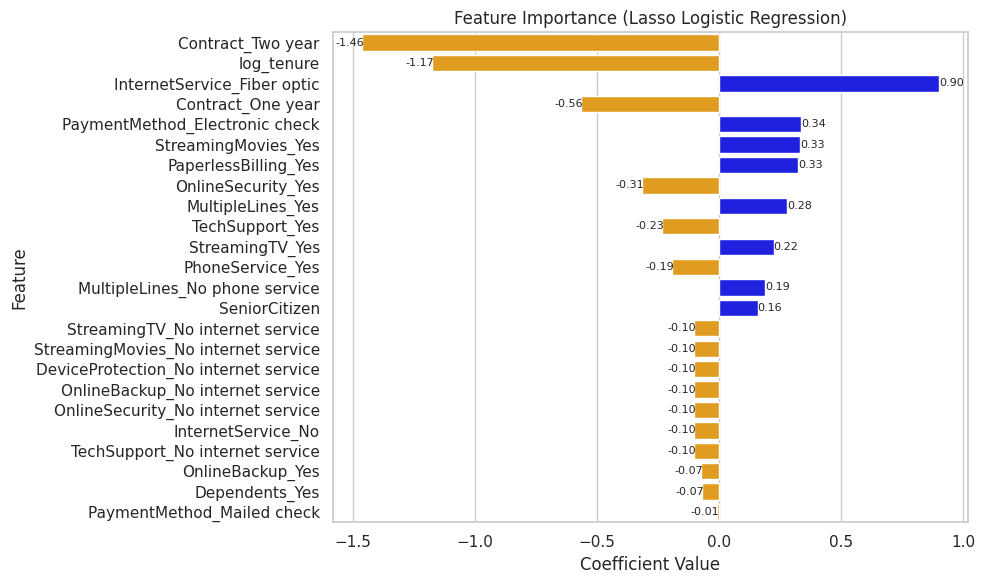

In [47]:
# Sort the coefficients by absolute value for plotting
sorted_coefficients = logistic_all_coefficients[logistic_all_coefficients != 0].sort_values(ascending=False, key=abs)

# Map the sign of coefficients to colors (blue for positive, orange for negative)
colors = ['blue' if coef > 0 else 'orange' for coef in sorted_coefficients]

# Plot the non-zero coefficients with color mapping
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette=colors)
plt.title('Feature Importance (Lasso Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

# Add labels for each bar
for i, bar in enumerate(ax.patches):
    coef = sorted_coefficients.values[i]
    ax.text(
        bar.get_width() + np.sign(bar.get_width()) * 0.05,  # Position of the text (slightly outside the bar)
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{coef:.2f}',  # Format the coefficient with 2 decimal points
        va='center', ha='center', fontsize=8  # Center the text vertically and horizontally
    )

plt.show()

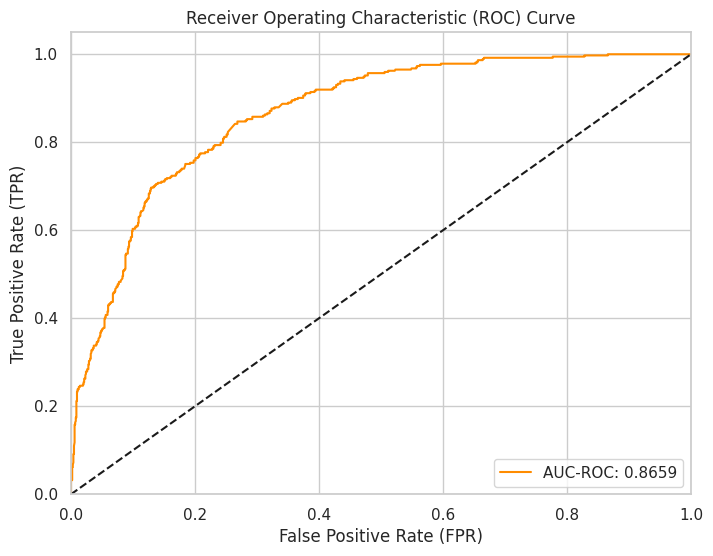

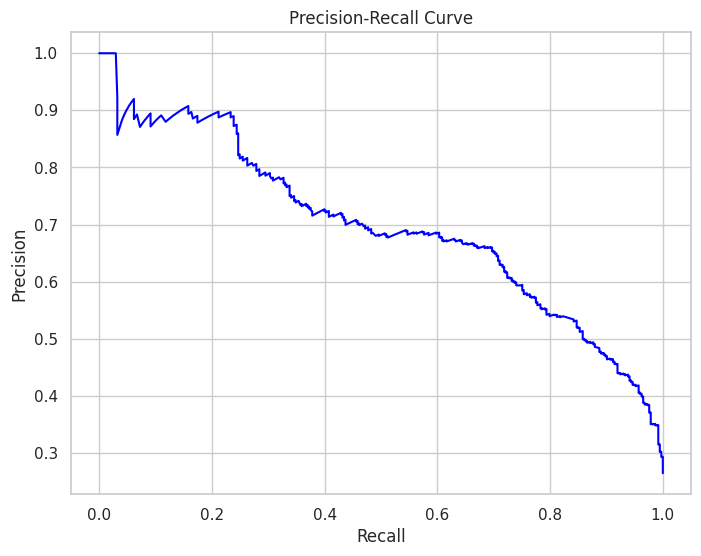

In [48]:
# Plot the AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test_logistic, y_pred_prob_logistic)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC: {roc_auc:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot the Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test_logistic, y_pred_prob_logistic)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

Logistic Regression Model Performance Evaluation (threshold =0.5)

- An accuracy of 0.8133 (or 81.33%) means that the model correctly predicted whether a customer would churn or not in approximately 81.33% of the cases.

- An AUC-ROC score of 0.8659 means that there is an 86.59% chance that the model will correctly distinguish between a random churner and a random non-churner.

- Precision measures the proportion of correctly predicted positive churn cases out of all predicted churn cases. In other words, of all the customers predicted to churn, 68.84% actually did.

- Recall measures the proportion of actual churn cases that were correctly identified by the model. It shows how well the model can capture true churn cases. A recall of 53.89% indicates that the model is missing a significant portion of actual churners (false negatives).

- The F1-score is the harmonic mean of precision and recall. It balances the trade-off between false positives (precision) and false negatives (recall).A score of 60.45% reflects that the model’s overall performance, particularly in handling the churn class, is somewhat moderate but not highly effective.

Summary:
* Strengths: The model’s accuracy (81.33%) and AUC-ROC (86.59%) suggest that it is good at distinguishing churners from non-churners overall, and it makes relatively accurate predictions.
* Weaknesses: The recall (53.89%) is quite low, meaning the model is not capturing a large proportion of actual churners. This could be a concern if the business’s priority is to minimize customer churn.
* Trade-off: The precision (68.84%) indicates that when the model predicts a customer will churn, it's often correct, but it still leaves room for improvement. A higher F1 score would be desired for better balance.




Perform customer threshold test to see which threshold works the best for the model.

In [49]:
# Get the predicted probabilities (for the positive class only)
y_pred_prob = logistic_pipeline.predict_proba(X_test_logistic)[:, 1]

# Define a function to evaluate model at different thresholds
def evaluate_threshold(y_true, y_pred_prob, threshold):
    # Apply the threshold to convert probabilities to binary predictions
    y_pred_threshold = np.where(y_pred_prob >= threshold, 1, 0)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_threshold)
    precision = precision_score(y_true, y_pred_threshold)
    recall = recall_score(y_true, y_pred_threshold)
    f1 = f1_score(y_true, y_pred_threshold)

    print(f"\nThreshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Evaluate the model for various thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for threshold in thresholds:
    evaluate_threshold(y_test_logistic, y_pred_prob, threshold)


Threshold: 0.10
Accuracy: 0.6139
Precision: 0.4038
Recall: 0.9625
F1 Score: 0.5689

Threshold: 0.20
Accuracy: 0.7048
Precision: 0.4698
Recall: 0.8981
F1 Score: 0.6169

Threshold: 0.30
Accuracy: 0.7771
Precision: 0.5562
Recall: 0.7828
F1 Score: 0.6503

Threshold: 0.40
Accuracy: 0.8211
Precision: 0.6501
Recall: 0.7024
F1 Score: 0.6753

Threshold: 0.50
Accuracy: 0.8133
Precision: 0.6884
Recall: 0.5389
F1 Score: 0.6045

Threshold: 0.60
Accuracy: 0.7963
Precision: 0.7337
Recall: 0.3619
F1 Score: 0.4847

Threshold: 0.70
Accuracy: 0.7871
Precision: 0.8288
Recall: 0.2466
F1 Score: 0.3802

Threshold: 0.80
Accuracy: 0.7587
Precision: 0.8837
Recall: 0.1019
F1 Score: 0.1827


I choose threshhold 0.4 as it has the best recall rate and best accuracy.

In [50]:
# Define the predictor variables and target variable
X_logistic_regression = df_encoded_logistic.drop(columns=['logistic_churn', 'tenure'])
y_logistic_regression = df_encoded_logistic['logistic_churn']  # Binary target variable

# Split data into train and test sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic_regression, y_logistic_regression, test_size=0.2, random_state=42)

# Create a pipeline with RobustScaler and Lasso logistic regression
logistic_pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Apply robust scaling to reduce the effect of outliers
    ('lasso', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, C=0.1))  # Lasso logistic regression
])

# Fit the model
logistic_pipeline.fit(X_train_logistic, y_train_logistic)

# Get predicted probabilities for the positive class (churn)
y_pred_prob_logistic = logistic_pipeline.predict_proba(X_test_logistic)[:, 1]

# Apply the custom threshold of 0.40 to make class predictions
custom_threshold = 0.40
y_pred_logistic_custom = np.where(y_pred_prob_logistic >= custom_threshold, 1, 0)

# Evaluate the model's performance at the custom threshold
accuracy = accuracy_score(y_test_logistic, y_pred_logistic_custom)
roc_auc = roc_auc_score(y_test_logistic, y_pred_prob_logistic)  # Use probabilities for ROC-AUC
precision = precision_score(y_test_logistic, y_pred_logistic_custom)
recall = recall_score(y_test_logistic, y_pred_logistic_custom)
f1 = f1_score(y_test_logistic, y_pred_logistic_custom)

# Print evaluation metrics
print(f"Threshold: {custom_threshold:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Get the coefficients from the Lasso logistic regression
logistic_coefficients = logistic_pipeline.named_steps['lasso'].coef_
logistic_feature_names = X_logistic_regression.columns

# Print all coefficients (including zero coefficients)
logistic_all_coefficients = pd.Series(logistic_coefficients.flatten(), index=logistic_feature_names)
print("\nAll Coefficients (including zero):")
print(logistic_all_coefficients)

# Print non-zero coefficients
print("\nNon-zero Coefficients after Lasso:")
print(logistic_all_coefficients[logistic_all_coefficients != 0])


Threshold: 0.40
Accuracy: 0.8211
AUC-ROC: 0.8659
Precision: 0.6501
Recall: 0.7024
F1-Score: 0.6753

All Coefficients (including zero):
SeniorCitizen                            0.158254
gender_Male                              0.000000
Partner_Yes                              0.000000
Dependents_Yes                          -0.068173
PhoneService_Yes                        -0.190844
MultipleLines_No phone service           0.190844
MultipleLines_Yes                        0.280068
InternetService_Fiber optic              0.901894
InternetService_No                      -0.102974
OnlineSecurity_No internet service      -0.102974
OnlineSecurity_Yes                      -0.314219
OnlineBackup_No internet service        -0.102974
OnlineBackup_Yes                        -0.071807
DeviceProtection_No internet service    -0.102974
DeviceProtection_Yes                     0.000000
TechSupport_No internet service         -0.102974
TechSupport_Yes                         -0.232741
StreamingTV_No 

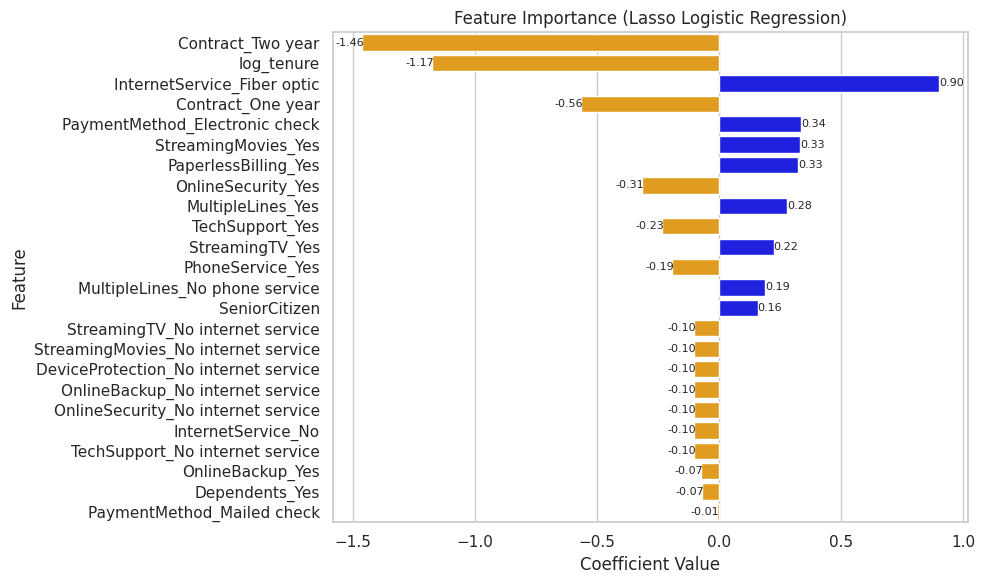

In [51]:
# Sort the coefficients by absolute value for plotting
sorted_coefficients = logistic_all_coefficients[logistic_all_coefficients != 0].sort_values(ascending=False, key=abs)

# Map the sign of coefficients to colors (blue for positive, orange for negative)
colors = ['blue' if coef > 0 else 'orange' for coef in sorted_coefficients]

# Plot the non-zero coefficients with color mapping
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette=colors)
plt.title('Feature Importance (Lasso Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

# Add labels for each bar
for i, bar in enumerate(ax.patches):
    coef = sorted_coefficients.values[i]
    ax.text(
        bar.get_width() + np.sign(bar.get_width()) * 0.05,  # Position of the text (slightly outside the bar)
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{coef:.2f}',  # Format the coefficient with 2 decimal points
        va='center', ha='center', fontsize=8  # Center the text vertically and horizontally
    )

plt.show()

Coefficients Interpretation for Logistic Regression Model:

1. Senior Citizen (Base: Not Senior Citizen)
   - Coefficient: 0.158245
   - \( e^{\beta_1} = e^{0.158245} = 1.1715 \)
   - The odds of churning for a senior citizen are approximately **1.17 times** (or **17% higher**) than for a non-senior citizen.

2. Dependents (Base: No Dependents)
   - Coefficient: -0.068170
   - \( e^{\beta_1} = e^{-0.068170} = 0.9341 \)
   - The odds of churning for a customer with dependents are approximately **0.93 times** (or **6.6% lower**) than for a customer without dependents.

3. Phone Service (Base: No Phone Service)
   - Coefficient: -0.190793
   - \( e^{\beta_1} = e^{-0.190793} = 0.8262 \)
   - The odds of churning for a customer with phone service are approximately **0.83 times** (or **17.4% lower**) than for a customer without phone service.

4. Multiple Lines_No Phone Service (Base: single line)
   - Coefficient: 0.190793
   - \( e^{\beta_1} = e^{0.190793} = 1.2102 \)
   - The odds of churning for a customer with **no phone service** are approximately **1.21 times** (or **21% higher**) than for a customer with a single line.

5. Multiple Lines_Yes (Base: single line)
   - Coefficient: 0.280036
   - \( e^{\beta_1} = e^{0.280036} = 1.3232 \)
   - The odds of churning for a customer with **multiple lines** are approximately **1.32 times** (or **32.3% higher**) than for a customer with a single line.

6. Internet Service_Fiber Optic (Base: DSL)
   - Coefficient: 0.901890
   - \( e^{\beta_1} = e^{0.901890} = 2.4639 \)
   - The odds of churning for a customer with **fiber optic internet** are approximately **2.46 times** (or **146.4% higher**) than for a customer with DSL.

7. Internet Service_No (Base: DSL)
   - Coefficient for Internet Service_No: -0.102962
   - \( e^{\beta_1} = e^{-0.102962} = 0.9020 \)
   - The odds of churning for a customer with no internet service are approximately **0.90 times** (or **10% lower**) than for a customer with DSL.

8. Online Security_Yes (Base: No Online Security)
   - Coefficient : -0.314161
   - \( e^{\beta_1} = e^{-0.314161} = 0.7305 \)
   - The odds of churning for a customer with **online security** are approximately **0.73 times** (or **26.95% lower**) than for a customer without online security.

9. Online Security_No Internet Service (Base: No Online Security)
   - Coefficient: -0.102962
   - \( e^{\beta_1} = e^{-0.102962} = 0.9020 \)
   - The odds of churning for a customer with **no internet service** are approximately **0.90 times** (or **10% lower**) than for a customer without online security.

10. Online Backup_Yes (Base: No Online Backup)
   - Coefficient: -0.071785
   - \( e^{\beta_1} = e^{-0.071785} = 0.9307 \)
   - The odds of churning for a customer with **online backup** are approximately **0.93 times** (or **6.9% lower**) than for a customer without online backup.

11. Online Backup_No Internet Service (Base: No Online Backup)
   - Coefficient: -0.102962
   - \( e^{\beta_1} = e^{-0.102962} = 0.9020 \)
   - The odds of churning for a customer with **no internet service** are approximately **0.90 times** (or **10% lower**) than for a customer without online backup.

12. Device Protection_No Internet Service  (Base: No Device Protection)**
   - Coefficient: -0.102962
   - \( e^{\beta_1} = e^{-0.102962} = 0.9020 \)
   - The odds of churning for a customer with **no internet service** are approximately **0.90 times** (or **10% lower**) than for a customer without device protection.

13. Tech Support_Yes (Base: No Tech Support)
   - Coefficient: -0.232709
   - \( e^{\beta_1} = e^{-0.232709} = 0.7923 \)
   - The odds of churning for a customer with **tech support** are approximately **0.79 times** (or **20.8% lower**) than for a customer without tech support.

14. Tech Support_No Internet Service (Base: No Tech Support)
   - Coefficient: -0.102962
   - \( e^{\beta_1} = e^{-0.102962} = 0.9020 \)
   - The odds of churning for a customer with **no internet service** are approximately **0.90 times** (or **10% lower**) than for a customer without tech support.

15. Streaming TV_No Internet Service (Base: No Streaming TV)
    - Coefficient: -0.102974
    - \( e^{\beta} = e^{-0.102974} = 0.9021 \)
    - The odds of churning for customers with no internet service and no streaming TV are approximately **0.90 times** (or **9.8% lower**) than for customers who do not use streaming TV but have internet service.

16. Streaming TV_Yes (Base: No Streaming TV)
     - Coefficient: 0.224141
     - \( e^{\beta} = e^{0.224141} = 1.2514 \)
     - The odds of churning for customers who have streaming TV are approximately **1.25 times** (or **25.1% higher**) than for customers who do not use streaming TV (with internet service).

17. Streaming Movies_No Internet Service (Base: No Streaming Movies)
     - Coefficient: -0.102974
     - \( e^{\beta} = e^{-0.102974} = 0.9021 \)
     - The odds of churning for customers with no internet service and no streaming movies are approximately **0.90 times** (or **9.8% lower**) than for customers who do not use streaming movies but have internet service.

18. Streaming Movies_Yes (Base: No Streaming Movies)
     - Coefficient: 0.332033
     - \( e^{\beta} = e^{0.332033} = 1.3938 \)
     - The odds of churning for customers who have streaming movies are approximately **1.39 times** (or **39.4% higher**) than for customers who do not use streaming movies (with internet service).

19. Contract_One Year (Base: Month-to-month)
     - Coefficient: -0.564602
     - \( e^{\beta} = e^{-0.564602} = 0.5686 \)
     - The odds of churning for customers with a one-year contract are approximately **0.57 times** (or **43.1% lower**) than for customers with a month-to-month contract.

20. Contract_Two Year (Base: Month-to-month)
     - Coefficient: -1.462449
     - \( e^{\beta} = e^{-1.462449} = 0.2316 \)
     - The odds of churning for customers with a two-year contract are approximately **0.23 times** (or **76.8% lower**) than for customers with a month-to-month contract.

21. Paperless Billing_Yes (Base: No)
     - Coefficient: 0.325098
     - \( e^{\beta} = e^{0.325098} = 1.3842 \)
     - The odds of churning for customers who use paperless billing are approximately **1.38 times** (or **38.4% higher**) than for customers who do not use paperless billing.

22. Payment Method_Electronic Check (Base: Bank transfer)
     - Coefficient: 0.336298
     - \( e^{\beta} = e^{0.336298} = 1.3997 \)
     - The odds of churning for customers who pay via electronic check are approximately **1.40 times** (or **40% higher**) than for customers who use bank transfer.

23. Payment Method_Mailed Check(Base: Bank transfer):
     - Coefficient: -0.007904
     - \( e^{\beta} = e^{-0.007904} = 0.9921 \)
     - The odds of churning for customers who pay via mailed check are approximately **0.99 times** (or **0.8% lower**) than for customers who use bank transfer.

24. Tenure (log-transformed)
   - Coefficient: -1.174147
   - \( e^{\beta} = e^{-1.174147} = 0.3086 \)
   - The odds of churning decrease by **69.1%** for each unit increase in the log of customer tenure. In other words, customers who have been with the company for longer periods (i.e., higher tenure) are significantly less likely to churn.








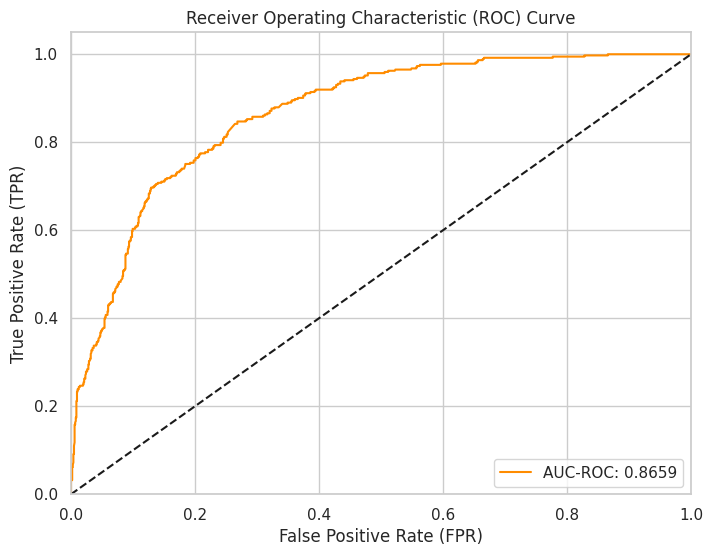

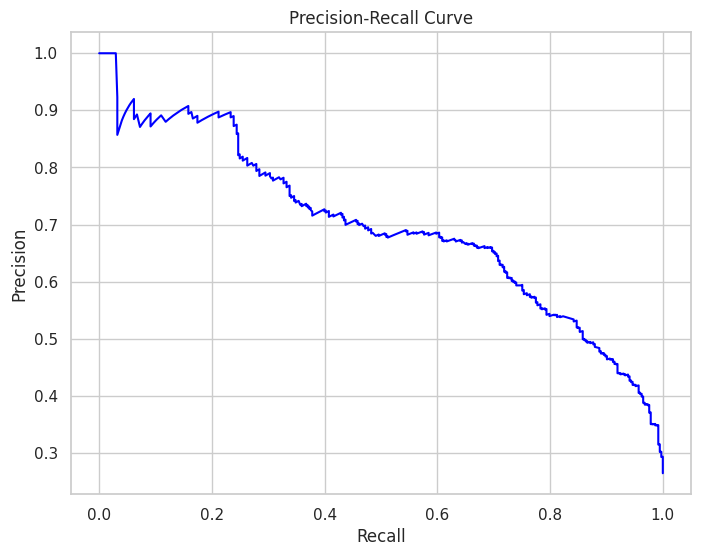

In [52]:
# Plot the AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test_logistic, y_pred_prob_logistic)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC: {roc_auc:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot the Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test_logistic, y_pred_prob_logistic)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

Logistic Regression Model Performance Evaluation (threshold =0.4)

- Accuracy: Accuracy represents the proportion of correctly predicted instances (both churn and non-churn) out of the total instances. With an accuracy of 82.11%, the model correctly predicted whether a customer would churn in 82% of the cases.

- AUC-ROC: The AUC-ROC (Area Under the Receiver Operating Characteristic curve) score measures the model’s ability to discriminate between the positive class (churners) and the negative class (non-churners). A score of 0.8659 indicates that the model has a strong ability to distinguish between churners and non-churners.

- Precision: Precision measures the proportion of true positives (actual churners) out of all predicted positives (customers predicted to churn). In other words, of all the customers that the model predicted to churn, 65.01% actually did. A precision of 65.01% means that there is still a significant portion of false positives (customers predicted to churn but who did not). This may not be a major concern if the company's goal is to identify churners even if it means getting some false positives.

- Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of actual positives (churners) that were correctly predicted by the model. In this case, 70.24% of actual churners were successfully identified by the model. It is a relatively good recall score.

- F1-Score: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between precision and recall. With an F1-score of 67.53%, the model is moderately effective at balancing false positives and false negatives. This score reflects that the model is doing reasonably well in capturing both true churners and minimizing incorrect churn predictions.

Summary:
- Strengths: The model demonstrates strong discriminatory power (AUC-ROC = 86.59%) and a relatively high accuracy (82.11%). The model does a decent job in predicting churners with good recall (70.24%), meaning it captures a significant portion of actual churners.

- Weaknesses: The model's precision (65.01%) could be improved. This may not be a major concern if the company's goal is to identify churners even if it means getting some false positives.


### GAM

#### Check the Independence of Observations Assumption: Observations should be indepedent of each other

I assume that observations are independent by design since there are no time-dependent variables or clustering effects in the dataset. This means that there should be no correlation between the observations.**

#### Check the no multicollinearity among predictors assumption: No perfect linear relationship among predictors

In [53]:
# Create the linear_churn variable
df['GAM_churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the new variable
print(df[['Churn', 'GAM_churn']].head())

  Churn  GAM_churn
0    No          0
1    No          0
2   Yes          1
3    No          0
4   Yes          1


In [54]:
# One-hot encode only the categorical variables
df_GAM = pd.get_dummies(df[categorical_vars], drop_first=True)

# Add the continuous variables and the target variable 'linear_churn' to the dataframe
df_GAM[continuous_vars] = df[continuous_vars]
df_GAM['GAM_churn'] = df['GAM_churn']

# Verify the structure of the new dataframe and the first few rows
df_GAM.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,GAM_churn
0,0,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,1,29.85,29.85,0
1,0,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,34,56.95,1889.5,0
2,0,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,2,53.85,108.15,1
3,0,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,45,42.30,1840.75,0
4,0,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,2,70.70,151.65,1


In [55]:
# Check the data types of the columns
print(df_GAM.dtypes)

SeniorCitizen                              int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No internet service             bool
StreamingTV_Yes                             bool
StreamingMovies_No internet service         bool
StreamingMovies_Yes 

In [56]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df_GAM['TotalCharges'] = pd.to_numeric(df_GAM['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' using the mean
df_GAM['TotalCharges'].fillna(df_GAM['TotalCharges'].mean(), inplace=True)

# Convert boolean columns to int (0 or 1)
df_GAM = df_GAM.astype({col: 'int64' for col in df_GAM.select_dtypes('bool').columns})

In [57]:
# Re-check the data types after conversion and imputation
print(df_GAM.dtypes)

SeniorCitizen                              int64
gender_Male                                int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes                            int64
StreamingTV_No internet service            int64
StreamingTV_Yes                            int64
StreamingMovies_No internet service        int64
StreamingMovies_Yes 

In [58]:
# Define the predictor variables and target variables
X = df_GAM.drop(columns=['GAM_churn'])  # Predictor variables
y = df_GAM['GAM_churn']  # Target variable

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                                 Variable          VIF
0                           SeniorCitizen     1.153352
1                             gender_Male     1.002151
2                             Partner_Yes     1.462800
3                          Dependents_Yes     1.384160
4                        PhoneService_Yes  1770.511404
5          MultipleLines_No phone service    60.841766
6                       MultipleLines_Yes     7.274304
7             InternetService_Fiber optic   148.263480
8                      InternetService_No          inf
9      OnlineSecurity_No internet service          inf
10                     OnlineSecurity_Yes     6.336111
11       OnlineBackup_No internet service          inf
12                       OnlineBackup_Yes     6.783390
13   DeviceProtection_No internet service          inf
14                   DeviceProtection_Yes     6.922428
15        TechSupport_No internet service          inf
16                        TechSupport_Yes     6.467282
17        


VIF Greater Than 10: exhibit multicollinearity
- PhoneService_Yes: 1770.511404
- MultipleLines_No phone service: 60.841766
- InternetService_Fiber optic: 148.263480
- StreamingTV_Yes: 24.056876
- StreamingMovies_Yes: 24.109486
- MonthlyCharges: 865.053343
- TotalCharges: 10.541130

VIF is Infinite (∞): indicate perfect collinearity
- InternetService_No
- OnlineSecurity_No internet service
- OnlineBackup_No internet service
- DeviceProtection_No internet service
- TechSupport_No internet service
- StreamingTV_No internet service
- StreamingMovies_No internet service

In order to address this multicollinearity
issue, I will manually penalize coefficients in the splines (ridge-like penalty) when building the GAM model. This works similarly to ridge regularization (L2 penalty), where a penalty is imposed on the size of the coefficients of the spline basis functions. This penalty encourages smoother curves and prevents the model from fitting noise in the data.

#### Check Homoscedasticity Assumption: Constant variance of residuals across all level of X

In [59]:
# No one-hot-encodings needed for GAMs.

# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now handle missing values, if any (for example, in 'TotalCharges')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# For categorical variables, use them directly in GAM (no LabelEncoder needed)
categorical_vars_GAM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

continuous_vars_GAM = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [60]:
# Check data type
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
linear_churn          int64
logistic_churn        int64
GAM_churn             int64
dtype: object


In [61]:
# Fit the GAM model
X = df[categorical_vars_GAM + continuous_vars_GAM]  # Include all predictor variables
y = df['GAM_churn']  # Target variable

# Print the column names along with their indices in the final dataset
for index, column_name in enumerate(X.columns):
    print(f"Index: {index}, Column Name: '{column_name}'")


Index: 0, Column Name: 'gender'
Index: 1, Column Name: 'SeniorCitizen'
Index: 2, Column Name: 'Partner'
Index: 3, Column Name: 'Dependents'
Index: 4, Column Name: 'PhoneService'
Index: 5, Column Name: 'MultipleLines'
Index: 6, Column Name: 'InternetService'
Index: 7, Column Name: 'OnlineSecurity'
Index: 8, Column Name: 'OnlineBackup'
Index: 9, Column Name: 'DeviceProtection'
Index: 10, Column Name: 'TechSupport'
Index: 11, Column Name: 'StreamingTV'
Index: 12, Column Name: 'StreamingMovies'
Index: 13, Column Name: 'Contract'
Index: 14, Column Name: 'PaperlessBilling'
Index: 15, Column Name: 'PaymentMethod'
Index: 16, Column Name: 'tenure'
Index: 17, Column Name: 'MonthlyCharges'
Index: 18, Column Name: 'TotalCharges'


In [62]:
# Function to check for the presence of strings in columns that should be numeric
def check_for_strings_in_numeric(df, column_name):
    # Check if the column data type is numeric (int or float)
    if df[column_name].dtype == "int64" or df[column_name].dtype == "float64":
        # Check for any entries that are stored as strings
        string_entries = df[column_name].apply(lambda x: isinstance(x, str)).sum()
        return string_entries
    else:
        # If the column is not intended to be numeric, return None
        return None


# Columns to check
columns_to_check = categorical_vars_GAM + continuous_vars_GAM

# Check each column and print the result
for column in columns_to_check:
    string_entries_count = check_for_strings_in_numeric(X, column)
    if string_entries_count is not None:
        print(f"Column: {column} has {string_entries_count} string entries.")
    else:
        print(f"Column: {column} is not intended to be numeric.")

Column: gender is not intended to be numeric.
Column: SeniorCitizen has 0 string entries.
Column: Partner is not intended to be numeric.
Column: Dependents is not intended to be numeric.
Column: PhoneService is not intended to be numeric.
Column: MultipleLines is not intended to be numeric.
Column: InternetService is not intended to be numeric.
Column: OnlineSecurity is not intended to be numeric.
Column: OnlineBackup is not intended to be numeric.
Column: DeviceProtection is not intended to be numeric.
Column: TechSupport is not intended to be numeric.
Column: StreamingTV is not intended to be numeric.
Column: StreamingMovies is not intended to be numeric.
Column: Contract is not intended to be numeric.
Column: PaperlessBilling is not intended to be numeric.
Column: PaymentMethod is not intended to be numeric.
Column: tenure has 0 string entries.
Column: MonthlyCharges has 0 string entries.
Column: TotalCharges has 0 string entries.


In [63]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column manually for the DataFrame X
X["gender"] = label_encoder.fit_transform(X["gender"])
X["SeniorCitizen"] = label_encoder.fit_transform(X["SeniorCitizen"])
X["Partner"] = label_encoder.fit_transform(X["Partner"])
X["Dependents"] = label_encoder.fit_transform(X["Dependents"])
X["PhoneService"] = label_encoder.fit_transform(X["PhoneService"])
X["MultipleLines"] = label_encoder.fit_transform(X["MultipleLines"])
X["InternetService"] = label_encoder.fit_transform(X["InternetService"])
X["OnlineSecurity"] = label_encoder.fit_transform(X["OnlineSecurity"])
X["OnlineBackup"] = label_encoder.fit_transform(X["OnlineBackup"])
X["DeviceProtection"] = label_encoder.fit_transform(X["DeviceProtection"])
X["TechSupport"] = label_encoder.fit_transform(X["TechSupport"])
X["StreamingTV"] = label_encoder.fit_transform(X["StreamingTV"])
X["StreamingMovies"] = label_encoder.fit_transform(X["StreamingMovies"])
X["Contract"] = label_encoder.fit_transform(X["Contract"])
X["PaperlessBilling"] = label_encoder.fit_transform(X["PaperlessBilling"])
X["PaymentMethod"] = label_encoder.fit_transform(X["PaymentMethod"])

In [64]:
# Define the GAM formula
gam_formula = (
    f(0) +
    f(1) +
    f(2) +
    f(3) +
    f(4) +
    f(5) +
    f(6) +
    f(7) +
    f(8) +
    f(9) +
    f(10) +
    f(11) +
    f(12) +
    f(13) +
    f(14) +
    f(15) +
    s(16) +
    s(17) +
    s(18)
)

# Fit the GAM model
gam = LogisticGAM(gam_formula).fit(X.values, y.values)

In [65]:
# Print the summary of the GAM model
print(gam.summary())

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     57.2836
Link Function:                        LogitLink Log Likelihood:                                 -2828.0356
Number of Samples:                         7043 AIC:                                             5770.6385
                                                AICc:                                             5771.628
                                                UBRE:                                               2.8259
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.306
Feature Function                  Lam

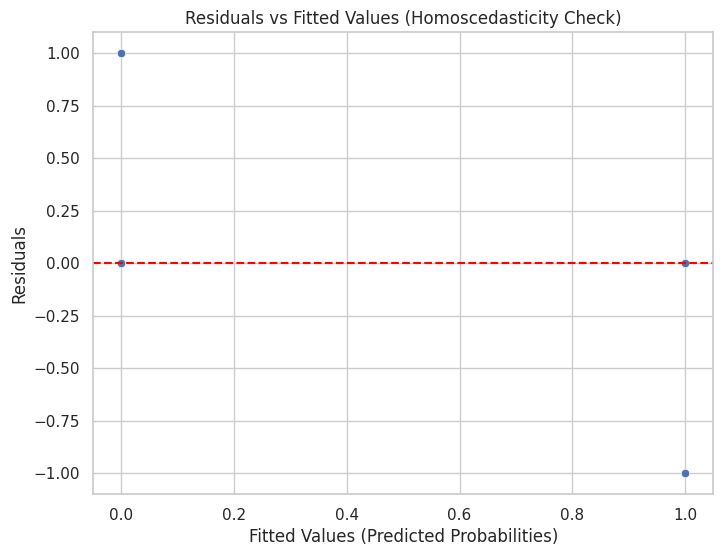

In [66]:
# Get the fitted values (predicted probabilities) and residuals
fitted_values = gam.predict(X)
fitted_values = fitted_values.astype(float)
residuals = y - fitted_values  # For logistic regression, residuals = actual - predicted probabilities

# Plot residuals vs fitted values to check for homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values (Predicted Probabilities)')
plt.ylabel('Residuals')
plt.show()

In [67]:
# Perform Breusch-Pagan test for heteroscedasticity
exog = sm.add_constant(fitted_values)  # Add a constant to the model
bp_test = het_breuschpagan(residuals, exog)

# bp_test[1] contains the p-value of the test
print(f'Breusch-Pagan test p-value: {bp_test[1]:.4f}')

if bp_test[1] < 0.05:
    print("Heteroscedasticity detected (p-value < 0.05)")
else:
    print("No heteroscedasticity detected (p-value >= 0.05)")

Breusch-Pagan test p-value: 0.0000
Heteroscedasticity detected (p-value < 0.05)


The Breusch-Pagan test shows p-value < 0.05, which indicates heteroscedasticity detected. In order to address heteroscedasticity issue, I'll apply weighted least squares (WLS) to the GAM to account for heteroscedasticity. The idea is to give less weight to observations with larger residuals or higher variance. This can improve the model’s efficiency under heteroscedastic conditions. In the meantime, I will apply gridsearch to find optimal smoothing parameters that better capture the structure of the data without overfitting.

#### Check the Large Enough Sample Size Assumption

Number of observations: 7043

Number of predictors: 19

Observations per predictor: 370.68

The large sample size assumption is satisfied with 370.68 observations per predictor.

#### GAM Model (Logistic GAM + manually penalize coefficients in the splines (ridge-like penalty) + weighted least squares (WLS) + GridSearch)

In [68]:
# Fit the GAM model
X = df[categorical_vars_GAM + continuous_vars_GAM]  # Include all predictor variables
y = df['GAM_churn']  # Target variable

In [69]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
# Print the column names along with their indices in the final dataset
for index, column_name in enumerate(X_train.columns):
    print(f"Index: {index}, Column Name: '{column_name}'")

Index: 0, Column Name: 'gender'
Index: 1, Column Name: 'SeniorCitizen'
Index: 2, Column Name: 'Partner'
Index: 3, Column Name: 'Dependents'
Index: 4, Column Name: 'PhoneService'
Index: 5, Column Name: 'MultipleLines'
Index: 6, Column Name: 'InternetService'
Index: 7, Column Name: 'OnlineSecurity'
Index: 8, Column Name: 'OnlineBackup'
Index: 9, Column Name: 'DeviceProtection'
Index: 10, Column Name: 'TechSupport'
Index: 11, Column Name: 'StreamingTV'
Index: 12, Column Name: 'StreamingMovies'
Index: 13, Column Name: 'Contract'
Index: 14, Column Name: 'PaperlessBilling'
Index: 15, Column Name: 'PaymentMethod'
Index: 16, Column Name: 'tenure'
Index: 17, Column Name: 'MonthlyCharges'
Index: 18, Column Name: 'TotalCharges'


In [71]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column manually for both X_train and X_test
X_train["gender"] = label_encoder.fit_transform(X_train["gender"])
X_test["gender"] = label_encoder.transform(X_test["gender"])

X_train["SeniorCitizen"] = label_encoder.fit_transform(X_train["SeniorCitizen"])
X_test["SeniorCitizen"] = label_encoder.transform(X_test["SeniorCitizen"])

X_train["Partner"] = label_encoder.fit_transform(X_train["Partner"])
X_test["Partner"] = label_encoder.transform(X_test["Partner"])

X_train["Dependents"] = label_encoder.fit_transform(X_train["Dependents"])
X_test["Dependents"] = label_encoder.transform(X_test["Dependents"])

X_train["PhoneService"] = label_encoder.fit_transform(X_train["PhoneService"])
X_test["PhoneService"] = label_encoder.transform(X_test["PhoneService"])

X_train["MultipleLines"] = label_encoder.fit_transform(X_train["MultipleLines"])
X_test["MultipleLines"] = label_encoder.transform(X_test["MultipleLines"])

X_train["InternetService"] = label_encoder.fit_transform(X_train["InternetService"])
X_test["InternetService"] = label_encoder.transform(X_test["InternetService"])

X_train["OnlineSecurity"] = label_encoder.fit_transform(X_train["OnlineSecurity"])
X_test["OnlineSecurity"] = label_encoder.transform(X_test["OnlineSecurity"])

X_train["OnlineBackup"] = label_encoder.fit_transform(X_train["OnlineBackup"])
X_test["OnlineBackup"] = label_encoder.transform(X_test["OnlineBackup"])

X_train["DeviceProtection"] = label_encoder.fit_transform(X_train["DeviceProtection"])
X_test["DeviceProtection"] = label_encoder.transform(X_test["DeviceProtection"])

X_train["TechSupport"] = label_encoder.fit_transform(X_train["TechSupport"])
X_test["TechSupport"] = label_encoder.transform(X_test["TechSupport"])

X_train["StreamingTV"] = label_encoder.fit_transform(X_train["StreamingTV"])
X_test["StreamingTV"] = label_encoder.transform(X_test["StreamingTV"])

X_train["StreamingMovies"] = label_encoder.fit_transform(X_train["StreamingMovies"])
X_test["StreamingMovies"] = label_encoder.transform(X_test["StreamingMovies"])

X_train["Contract"] = label_encoder.fit_transform(X_train["Contract"])
X_test["Contract"] = label_encoder.transform(X_test["Contract"])

X_train["PaperlessBilling"] = label_encoder.fit_transform(X_train["PaperlessBilling"])
X_test["PaperlessBilling"] = label_encoder.transform(X_test["PaperlessBilling"])

X_train["PaymentMethod"] = label_encoder.fit_transform(X_train["PaymentMethod"])
X_test["PaymentMethod"] = label_encoder.transform(X_test["PaymentMethod"])

In [72]:
# Define the initial GAM formula without weight and penalties
initial_gam_formula = (
    f(0) +
    f(1) +
    f(2) +
    f(3) +
    f(4) +
    f(5) +
    f(6) +
    f(7) +
    f(8) +
    f(9) +
    f(10) +
    f(11) +
    f(12) +
    f(13) +
    f(14) +
    f(15) +
    s(16) +
    s(17) +
    s(18)
)

# Fit the initial GAM model without weights
initial_gam = LogisticGAM(initial_gam_formula).fit(X_train.values, y_train.values)

In [73]:
# Get residuals from the initial model
residuals = y_train.values - initial_gam.predict(X_train.values)

# Define a small epsilon to prevent division by zero or very small residuals
epsilon = 1e-6

# Calculate weights based on residuals for each observation (inverse of residuals squared, with epsilon)
weights_train = 1 / (residuals ** 2 + epsilon)

In [74]:
# Define the GAM formula
gam_formula_final = (
    f(0) +
    f(1) +
    f(2) +
    f(3) +
    f(4) +
    f(5) +
    f(6) +
    f(7) +
    f(8) +
    f(9) +
    f(10) +
    f(11) +
    f(12) +
    f(13) +
    f(14) +
    f(15) +
    s(16, n_splines=5, lam=0.6) + #ridge-like penalty for tenure
    s(17, n_splines=5, lam=0.6) + # ridge-like penalty for MonthlyCharges
    s(18, n_splines=5, lam=0.6)  # ridge-like penalty for TotalCharges
)

In [75]:
# Define range for lambda (penalty)
lam_range = np.logspace(-2, 1, 10)

# Fit the final GAM model with grid search and weights
gam_final = LogisticGAM(gam_formula_final).gridsearch(X_train.values, y_train.values, weights=weights_train, lam=lam_range)

# Get model summary to inspect results
print(gam_final.summary())

 60% (6 of 10) |###############          | Elapsed Time: 0:00:20 ETA:   0:00:13

did not converge


100% (10 of 10) |########################| Elapsed Time: 0:00:21 Time:  0:00:21


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     32.9994
Link Function:                        LogitLink Log Likelihood:                                -13734.7773
Number of Samples:                         5634 AIC:                                            27535.5534
                                                AICc:                                           27535.9785
                                                UBRE:                                           60683.9328
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9233
Feature Function                  Lam

In [76]:
# Predict probabilities instead of class labels for AUC
y_prob = gam_final.predict_proba(X_test.values)

# Convert predicted probabilities to binary class labels (threshold of 0.5 by default)
y_pred = (y_prob >= 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute AUC (use predicted probabilities for AUC)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

# Compute F1 score (harmonic mean of precision and recall)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Compute precision (true positives / (true positives + false positives))
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Compute recall (true positives / (true positives + false negatives))
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Accuracy: 0.8133
AUC: 0.8602
F1 Score: 0.6172
Precision: 0.6752
Recall: 0.5684


GAM - Partial Dependence Plot

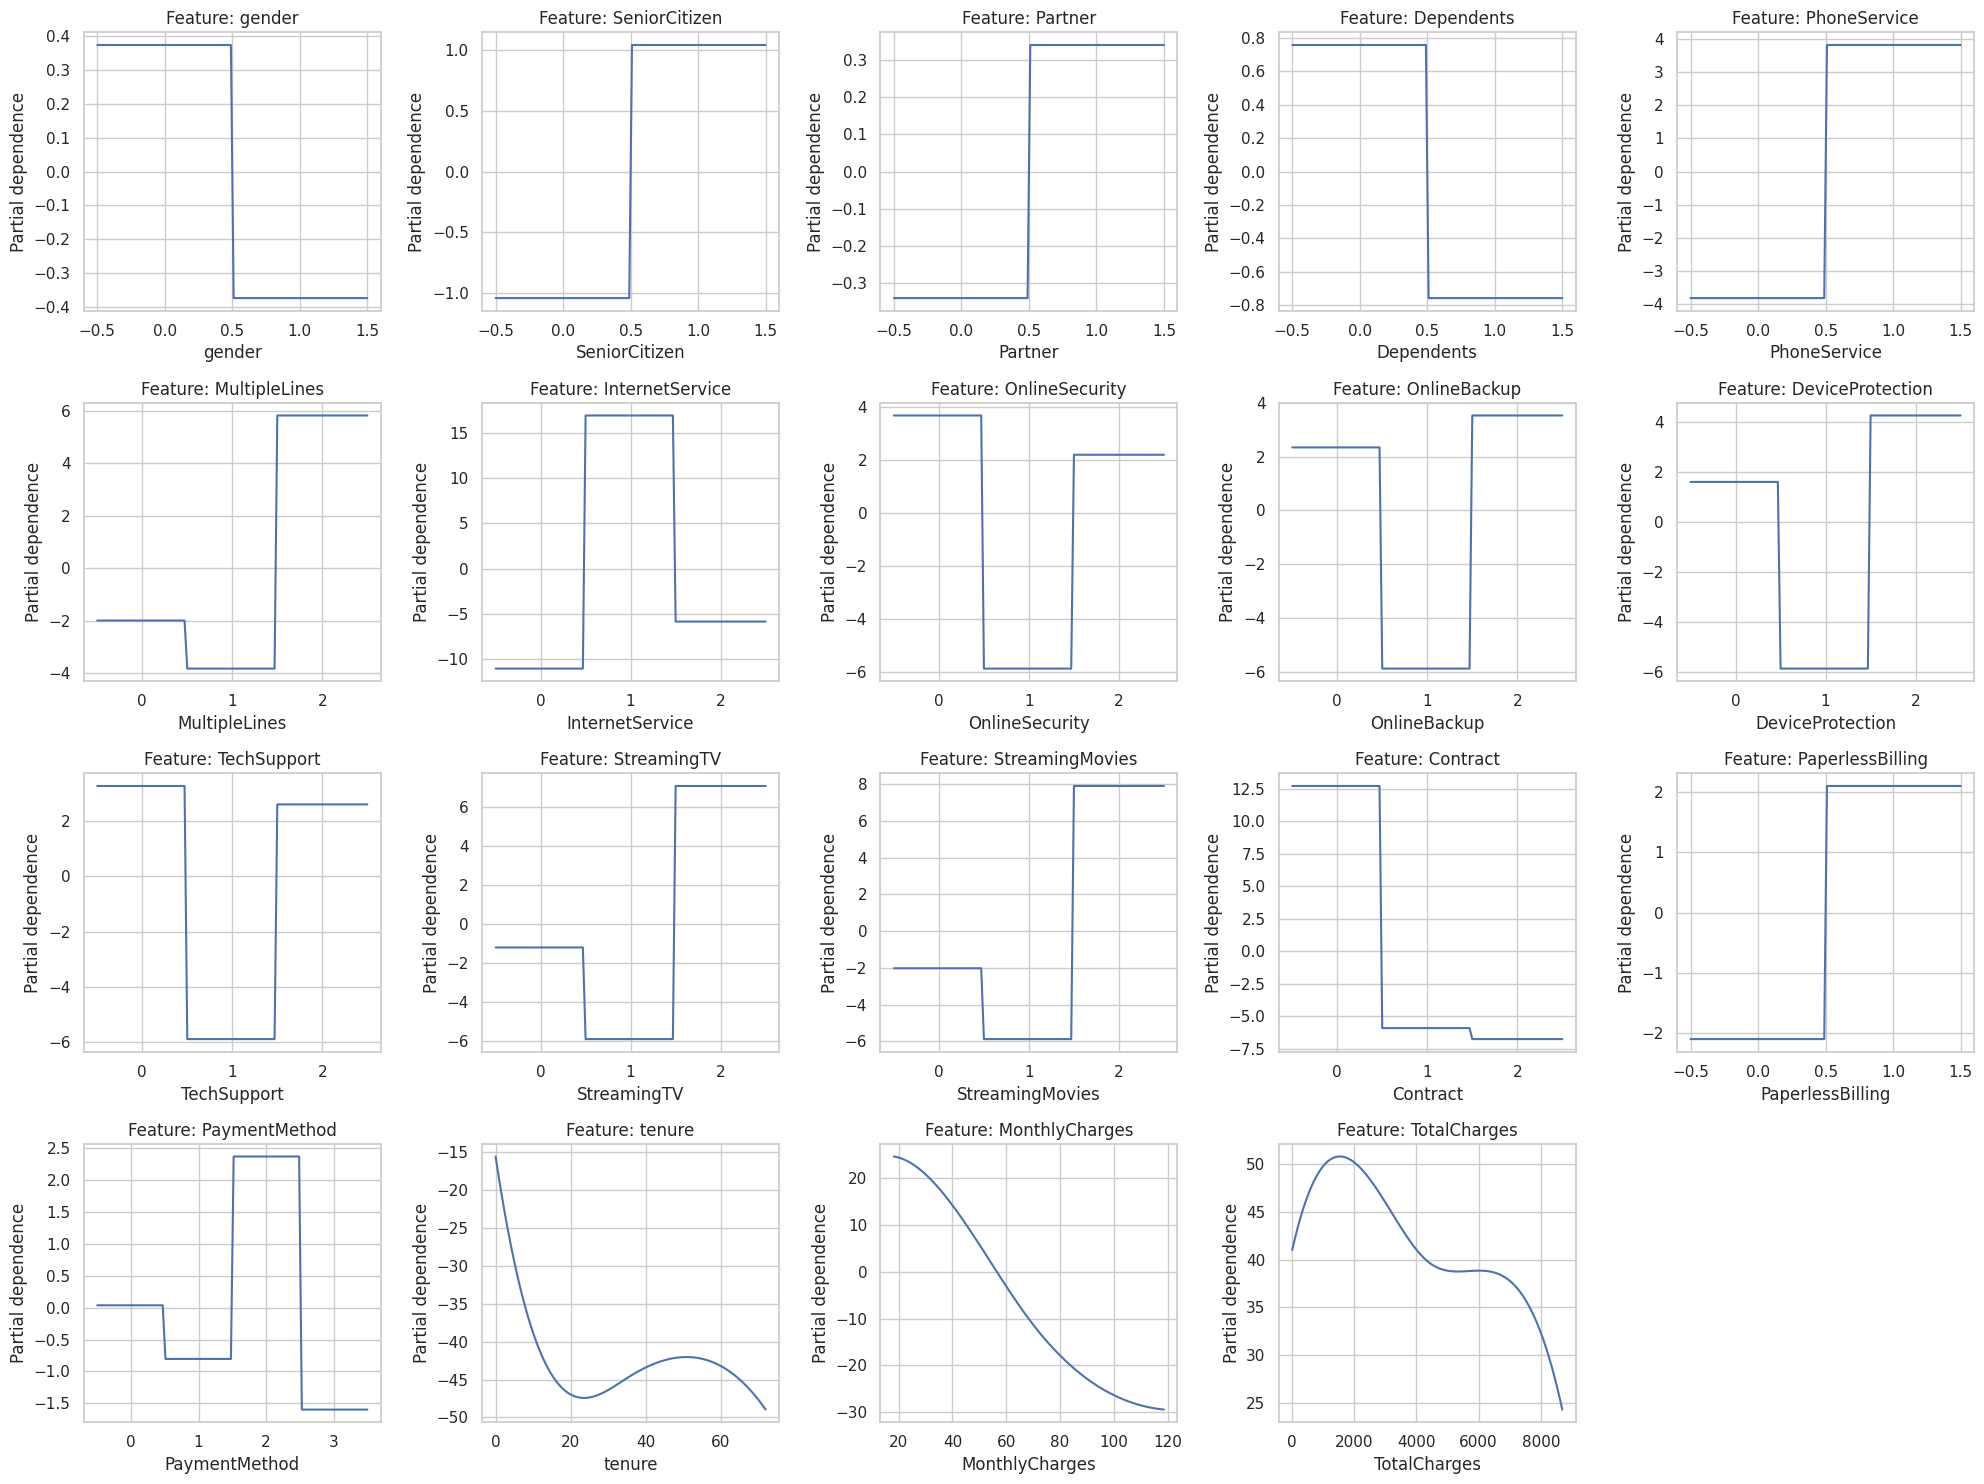

In [77]:
# Visualize Partial Dependence for GAM Model
plt.figure(figsize=(20, 15))  # Adjust figure size to fit 20 subplots (4x5 grid)
for i, term in enumerate(gam_final.terms):
    if term.isintercept:  # Skip the intercept term
        continue
    plt.subplot(4, 5, i+1)  # Use a 4x5 grid (4 rows, 5 columns)
    XX = gam_final.generate_X_grid(term=i)  # Generate grid for the partial dependence
    plt.plot(XX[:, term.feature], gam_final.partial_dependence(term=i, X=XX))
    plt.title(f'Feature: {X_train.columns[term.feature]}')  # Use your feature names
    plt.ylabel('Partial dependence')
    plt.xlabel(X_train.columns[term.feature])  # Label x-axis with feature name
plt.tight_layout()  # Adjust subplot spacing
plt.show()

Model Summary Analysis:

* The low penalty (lambda = 0.01) and high pseudo R-squared indicate that the model is likely very flexible, capturing a lot of variance in the data.
* Feature Importance: The p-values indicate that all features are highly significant.

GAM Performance Evaluation:

* Balanced Performance: The accuracy of 81.33% and AUC of 86.02% indicate that the model is generally performing well, especially at distinguishing between classes.
* Precision vs. Recall Tradeoff: The precision of 67.52% indicates that when the model predicts a positive case, it's correct most of the time, but the recall of 56.84% shows that it's missing a significant portion of actual positive cases. This suggests the model is cautious about predicting positive cases, leading to fewer false positives but more false negatives.
* F1 Score: The F1 score of 61.72% reflects the balance between precision and recall, but it's not particularly high, meaning there could be room for improving the model, especially in identifying positive cases more accurately (improving recall).

Check which threshold works the best to improve recall rate

In [78]:
# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)  # From 0.1 to 0.9 with a step of 0.1

# Lists to store evaluation metrics at each threshold
recall_scores = []
precision_scores = []
f1_scores = []
auc_scores = []
accuracy_scores = []

# Loop through the thresholds and calculate metrics
for threshold in thresholds:
    y_pred_adjusted = (y_prob >= threshold).astype(int)  # Adjust prediction based on threshold

    # Calculate metrics
    recall = recall_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    accuracy = accuracy_score(y_test, y_pred_adjusted)

    # AUC is threshold-independent, so you calculate it once and append for all thresholds
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)  # AUC does not depend on the threshold

    # Store the results
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

    # Print results for each threshold
    print(f"Threshold: {threshold:.1f} | Recall: {recall:.4f} | Precision: {precision:.4f} | F1 Score: {f1:.4f} | Accuracy: {accuracy:.4f} | AUC: {auc:.4f}")

Threshold: 0.1 | Recall: 0.6273 | Precision: 0.6411 | F1 Score: 0.6341 | Accuracy: 0.8084 | AUC: 0.8602
Threshold: 0.2 | Recall: 0.6113 | Precision: 0.6552 | F1 Score: 0.6325 | Accuracy: 0.8119 | AUC: 0.8602
Threshold: 0.3 | Recall: 0.5898 | Precision: 0.6567 | F1 Score: 0.6215 | Accuracy: 0.8098 | AUC: 0.8602
Threshold: 0.4 | Recall: 0.5818 | Precision: 0.6656 | F1 Score: 0.6209 | Accuracy: 0.8119 | AUC: 0.8602
Threshold: 0.5 | Recall: 0.5684 | Precision: 0.6752 | F1 Score: 0.6172 | Accuracy: 0.8133 | AUC: 0.8602
Threshold: 0.6 | Recall: 0.5576 | Precision: 0.6775 | F1 Score: 0.6118 | Accuracy: 0.8126 | AUC: 0.8602
Threshold: 0.7 | Recall: 0.5442 | Precision: 0.6835 | F1 Score: 0.6060 | Accuracy: 0.8126 | AUC: 0.8602
Threshold: 0.8 | Recall: 0.5174 | Precision: 0.6868 | F1 Score: 0.5902 | Accuracy: 0.8098 | AUC: 0.8602
Threshold: 0.9 | Recall: 0.4772 | Precision: 0.6899 | F1 Score: 0.5642 | Accuracy: 0.8048 | AUC: 0.8602


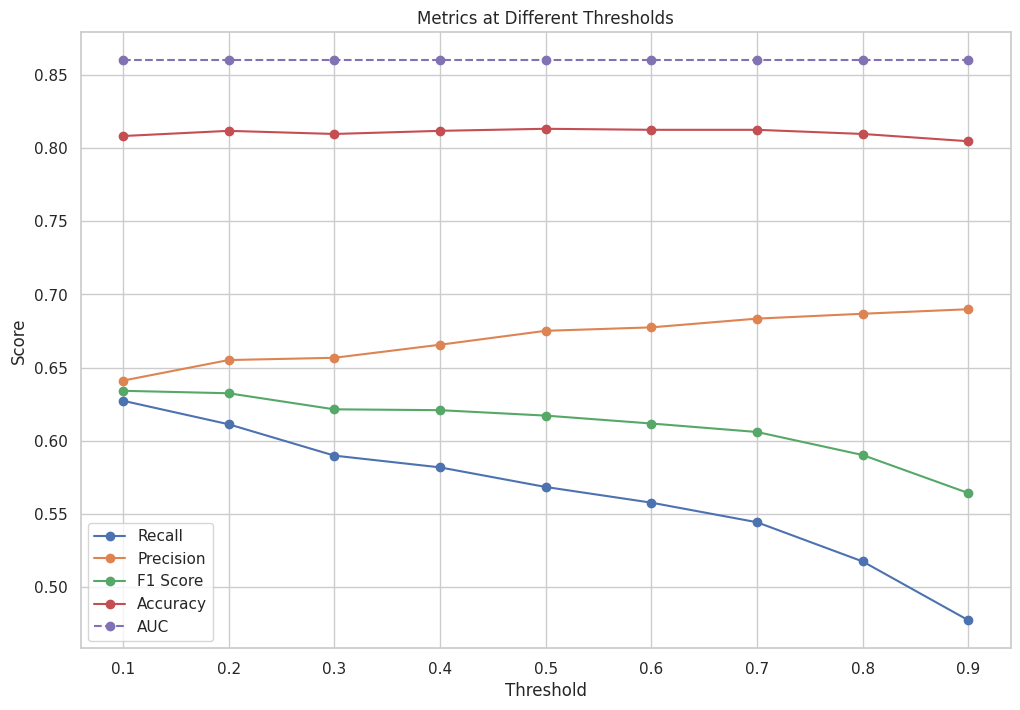

In [79]:
# Plot the results
plt.figure(figsize=(12, 8))

# Plot recall, precision, f1, accuracy, and AUC against thresholds
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.plot(thresholds, auc_scores, label='AUC', marker='o', linestyle='--')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

I decide to choose threshold 0.1 as it has the best recall rate and a good accuracy.

Overall Evaluation of the GAM Model with Threshold 0.1:

- Improved Recall (62.73%): By lowering the threshold, the model catches more at-risk customers, which is critical because missing a churner means losing a customer. This is important for the business because it provides an opportunity to intervene with retention strategies for a larger portion of churners.

- Trade-off with Precision (64.11%): The cost of improving recall is a slight reduction in precision. This means that some resources will be spent on customers who are not actually at risk of churning (false positives), but this may be an acceptable trade-off to avoid missing true churners.

- Balanced F1 Score (63.41%): The F1 score indicates that the model is reasonably well-balanced between precision and recall. This balance is important in the churn context because the company wants to avoid missing churners while also not over-predicting churn and wasting resources on false positives.

- Accuracy (80.84%): The model is performing well in terms of overall accuracy.

- AUC (86.02%): The high AUC score demonstrates that the model is generally very good at distinguishing between the two classes, making it a reliable classifier.

### Model Comparison




#### Model Performance Comparison

1. Linear Regression Model Performance:
- **MSE (Mean Squared Error)**: 0.17, indicating that the model's predictions are relatively close to the actual values.
- **R² Score**: 0.15, meaning that the model explains only **15%** of the variance in churn. This is a low value, suggesting that the model is not capturing much of the underlying structure in the data.

- **Strengths**: The low MSE indicates small prediction errors, showing that the model makes relatively accurate predictions in terms of minimizing error.
- **Weaknesses**: The low R² score suggests that linear regression fails to explain much of the variability in churn. This is likely due to the **linear nature** of the model, which may be too simplistic to capture more complex, non-linear relationships in the data.
The linear regression model is not suitable for predicting binary outcome (churn or nor churn) in this scenario.

2. Logistic Regression Model Performance (Threshold = 0.4):
- **Accuracy**: 82.11%, meaning the model correctly predicted churn in **82%** of the cases.
- **AUC-ROC**: 0.8659, indicating strong discriminatory power between churners and non-churners.
- **Precision**: 65.01%, meaning that **65.01%** of customers predicted to churn actually churned, while the rest were false positives.
- **Recall**: 70.24%, meaning the model successfully identified **70.24%** of actual churners.
- **F1 Score**: 67.53%, indicating a moderate balance between precision and recall.

- **Strengths**: The model performs well in terms of **accuracy** and **discriminatory power** (high AUC-ROC). The relatively high recall is advantageous for identifying at-risk customers, meaning the model captures a significant portion of actual churners.
- **Weaknesses**: The **precision (65.01%)** suggests that while many churners are identified, there is still a significant number of false positives (customers incorrectly predicted to churn). This could lead to inefficient resource allocation when attempting retention strategies for non-churners.

3. Generalized Additive Model (GAM) Performance (Threshold = 0.1):
- **Accuracy**: 80.84%, meaning the model correctly predicted churn in **80.84%** of cases.
- **AUC-ROC**: 0.8602, indicating strong discriminatory ability.
- **Precision**: 64.11%, meaning that **64.11%** of customers predicted to churn actually churned.
- **Recall**: 62.73%, meaning the model identified **62.73%** of actual churners.
- **F1 Score**: 63.41%, providing a balance between precision and recall.

- **Strengths**: The GAM's flexible structure allows it to capture **non-linear relationships** between features and the likelihood of churn. The **AUC-ROC of 0.8602** suggests the model is still good at distinguishing between churners and non-churners.
- **Weaknesses**: The **precision (64.11%)** and **recall (62.73%)** are relatively low compare to logistic regressions metrics.

#### Strength and Weakness of each Model

(1) Linear Regression with Lasso regularization

Pros:
- How predictions are produced is transparent
- Lots of documentation, used widely across domains
- Based on solid statistical theory
- Lasso performs feature selection to help keep the most important features that predict the outcome

Cons:
- Can only represent linear relationships
- Usually not as accurate because the real world is complex and nonlinear
- The interpretation of a weight is dependent on other features
- Not good for modeling binary dependent variable (0 or 1) since it treats the binary outcome as continuous.

(2) Robust Logistic Regression with lasso regularization

Pros:
- Good for modeling binary dependent variable (0 or 1)
- Robust logistic regression more resistant to outliers or extreme values in the data
- Lasso performs feature selection to help keep the most important features that predict the outcome.

Cons:
- Assumes a linear relationship between the independent variables (features) and the log-odds of the dependent variable (outcome). However, many real-world problems involve complex, non-linear relationships between features and outcomes.

(3) Logistic GAM with penalization, weighted least squares (WLS) and grid search:

Pros:
- How predictions are produced is transparent
- Lots of documentation, used widely across domains
- Based on solid statistical theory
- Allows nonlinear relationships to be modeled
- Partial Dependence Plot visualize the relationship between predictor variables and the predicted outcome, while holding all other variables constant. This helps interpret how each feature in the model affects the target variable, whether linearly or non-linearly, and provides insights into the model's behavior.
- Penalization prevents the model from fitting noise in the data.
- WLS improve the model’s efficiency under heteroscedastic conditions.
- Grid search find optimal smoothing parameters that better capture the structure of the data without overfitting

Cons:
- Most modifications of the linear model make the model less interpretable

### Final Recommendations

- Logistic Regression (Threshold = 0.4) is a strong choice for the telecommunications company if the goal is to balance interpretability and predictive performance. It provides an intuitive understanding of the relationship between features and churn risk, with strong recall and accuracy.

- Generalized Additive Model (GAM) is recommended for situations where the company wants a more nuanced understanding of non-linear feature effects on churn, with visual tools like Partial Dependence Plots to interpret feature contributions. It captures more complex patterns and offers the potential to better explain customer churn behavior.

In general, if understanding the drivers of churn and interpreting feature importance is more important to the company, GAM offers more flexibility. If ease of interpretation and predictive performance are prioritized, logistic regression should be preferred. Both models can complement each other: the logistic regression model can serve as a baseline for operational use, while the GAM model can provide deeper insights for strategic decision-making and understanding of churn factors.